# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [5]:
#Importanto bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importando base de dados

renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [7]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

Analisando as informações do DataFrame, percebemos que as variáveis qualitativas, que podem ser influênciadas pela variável "data_ref":<br>
<li>sexo</li>
<li>posse_de_veiculo</li>
<li>posse_de_imovel</li>
<li>qtd_filhos</li>
<li>tipo_renda</li>
<li>educacao</li>
<li>estado_civil</li>
<li>tipo_residencia</li>
<li>qt_pessoas_residencia</li>
<li>mau</li>

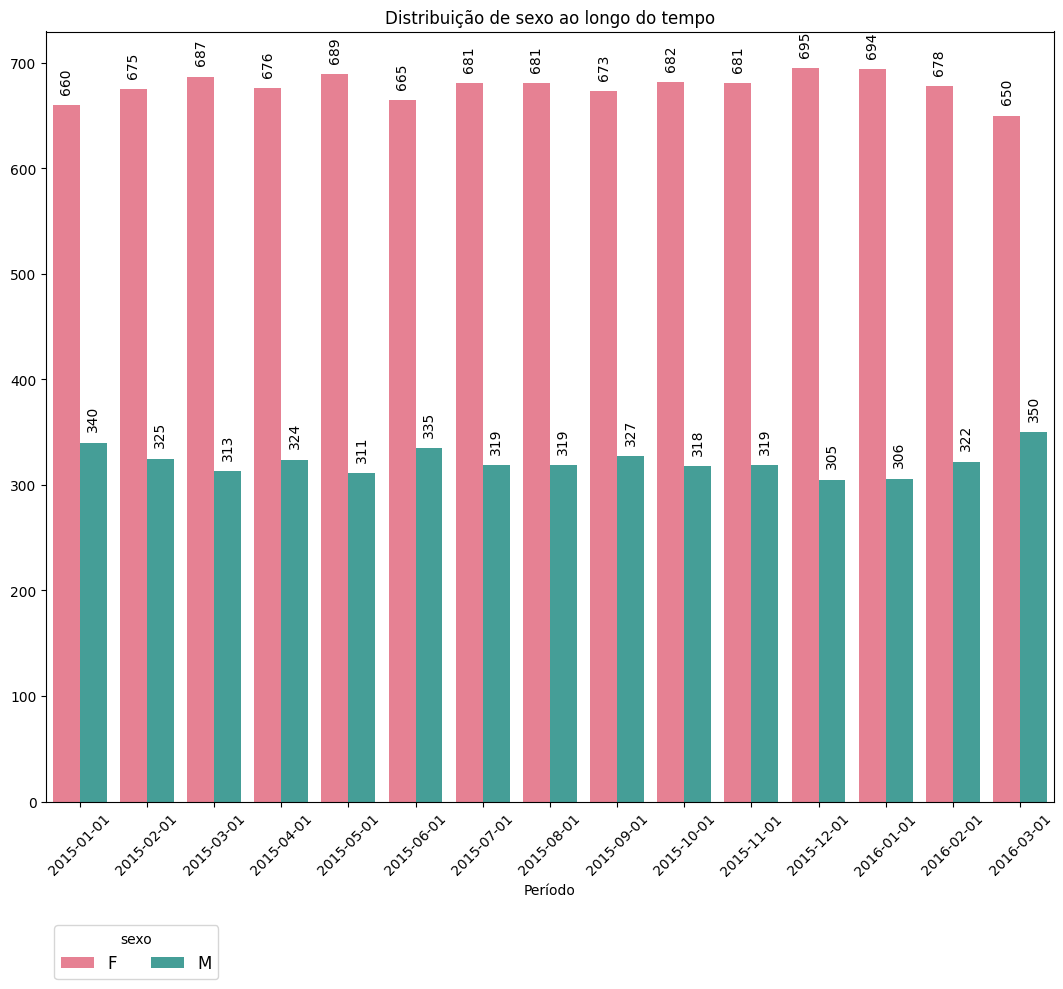

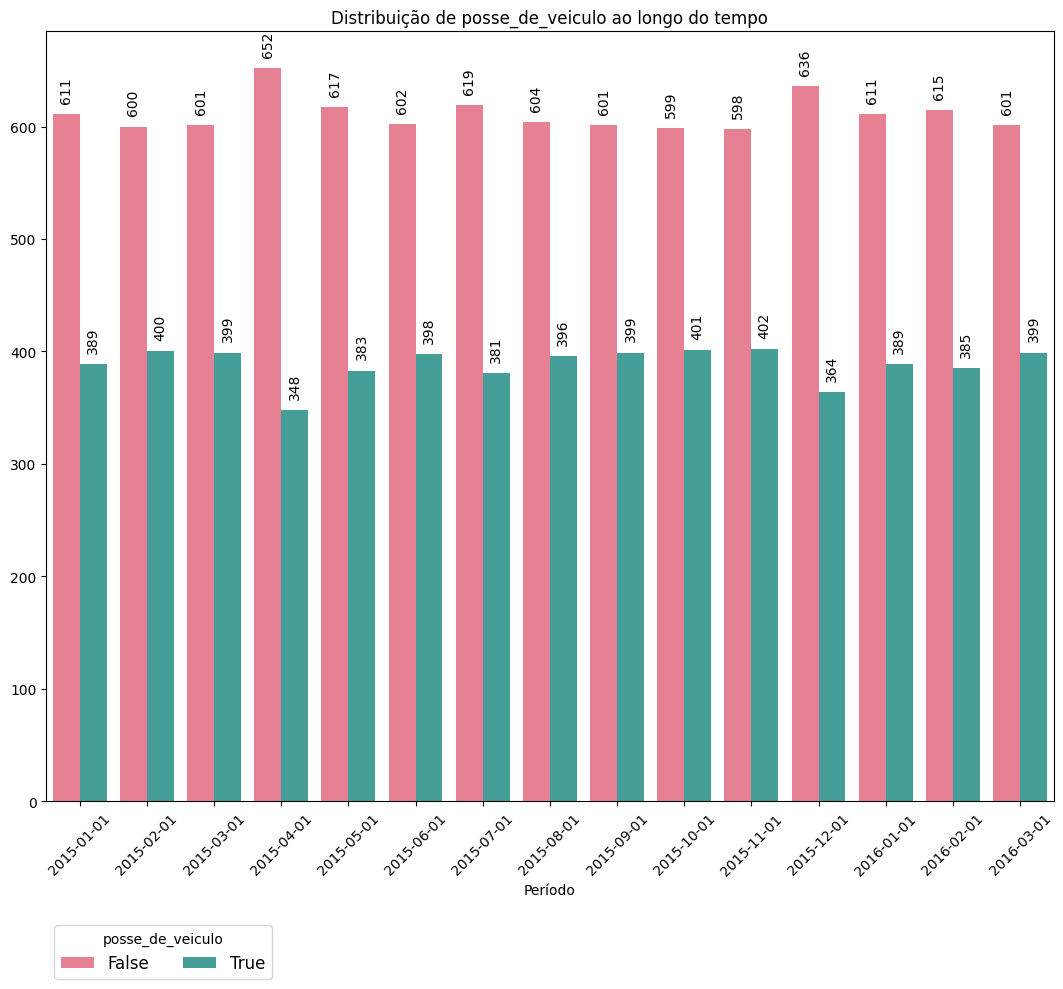

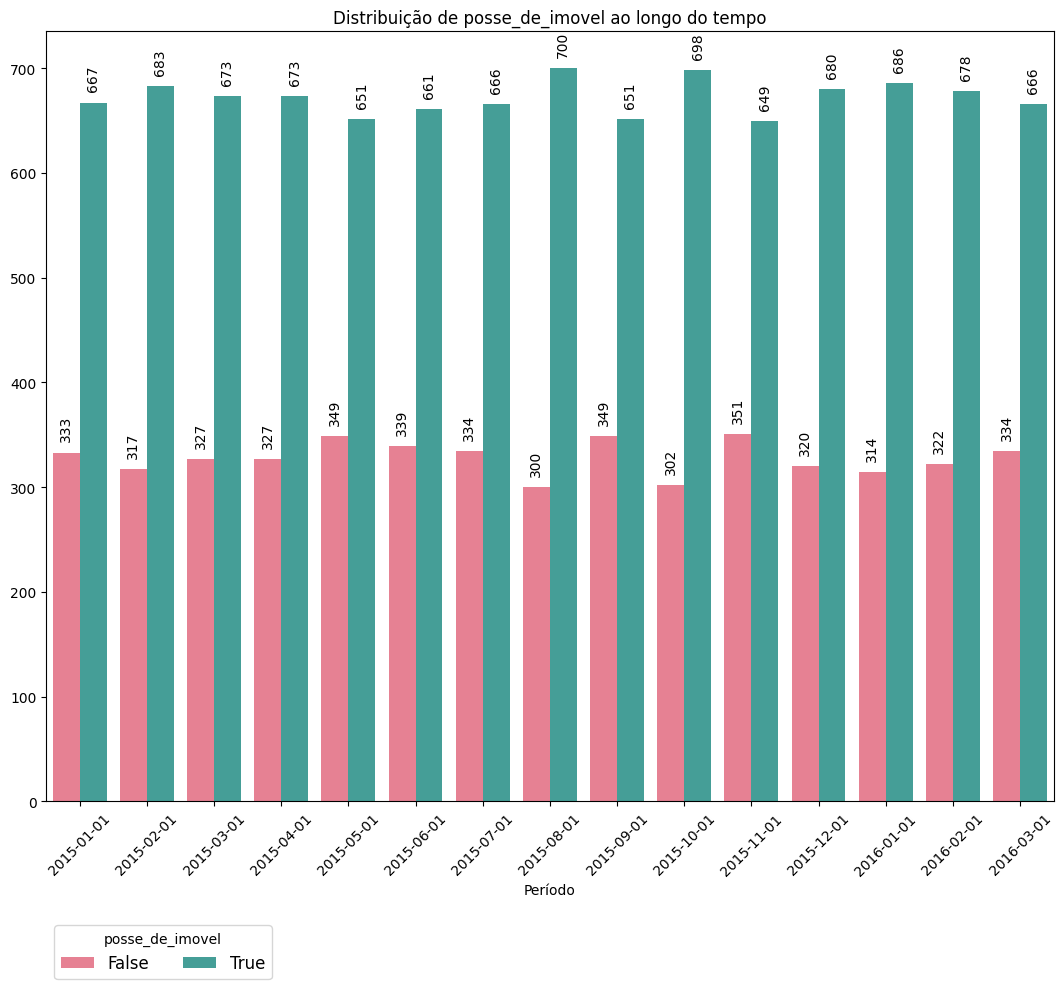

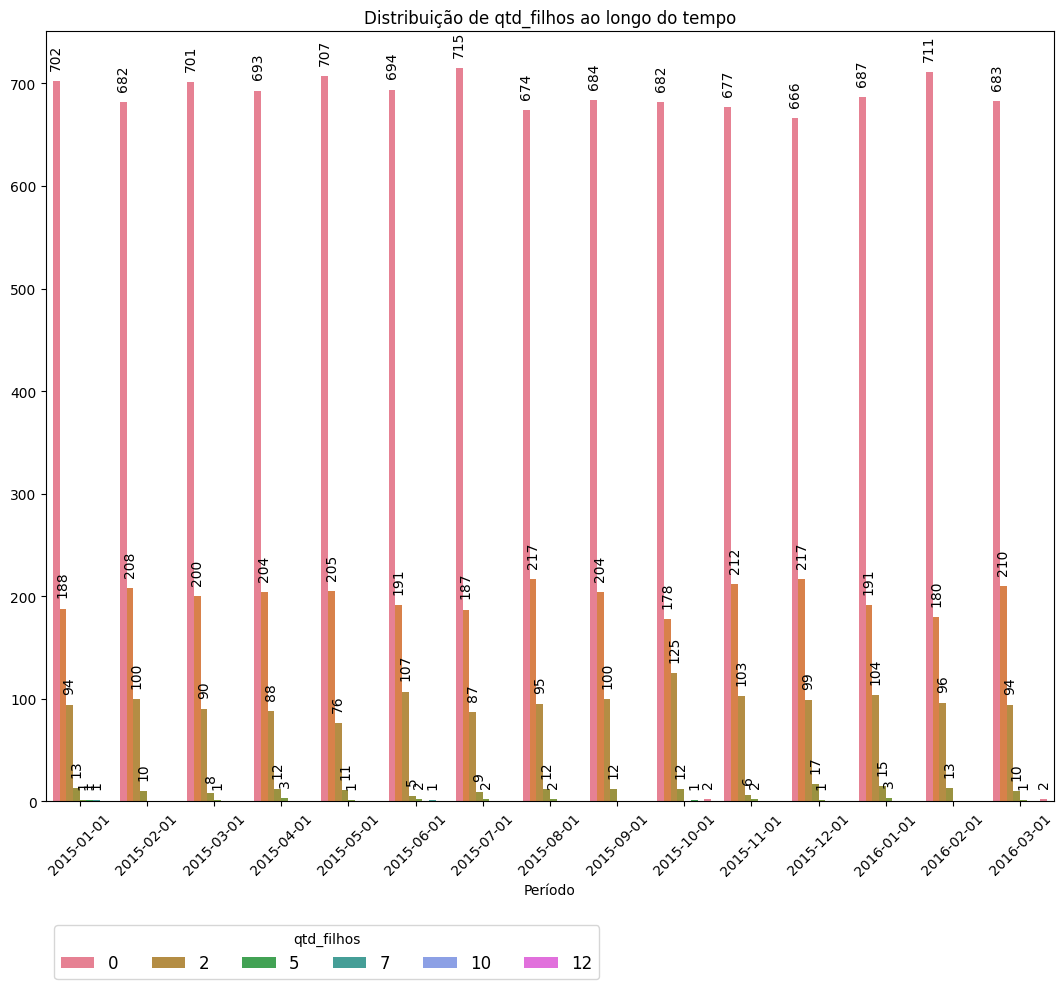

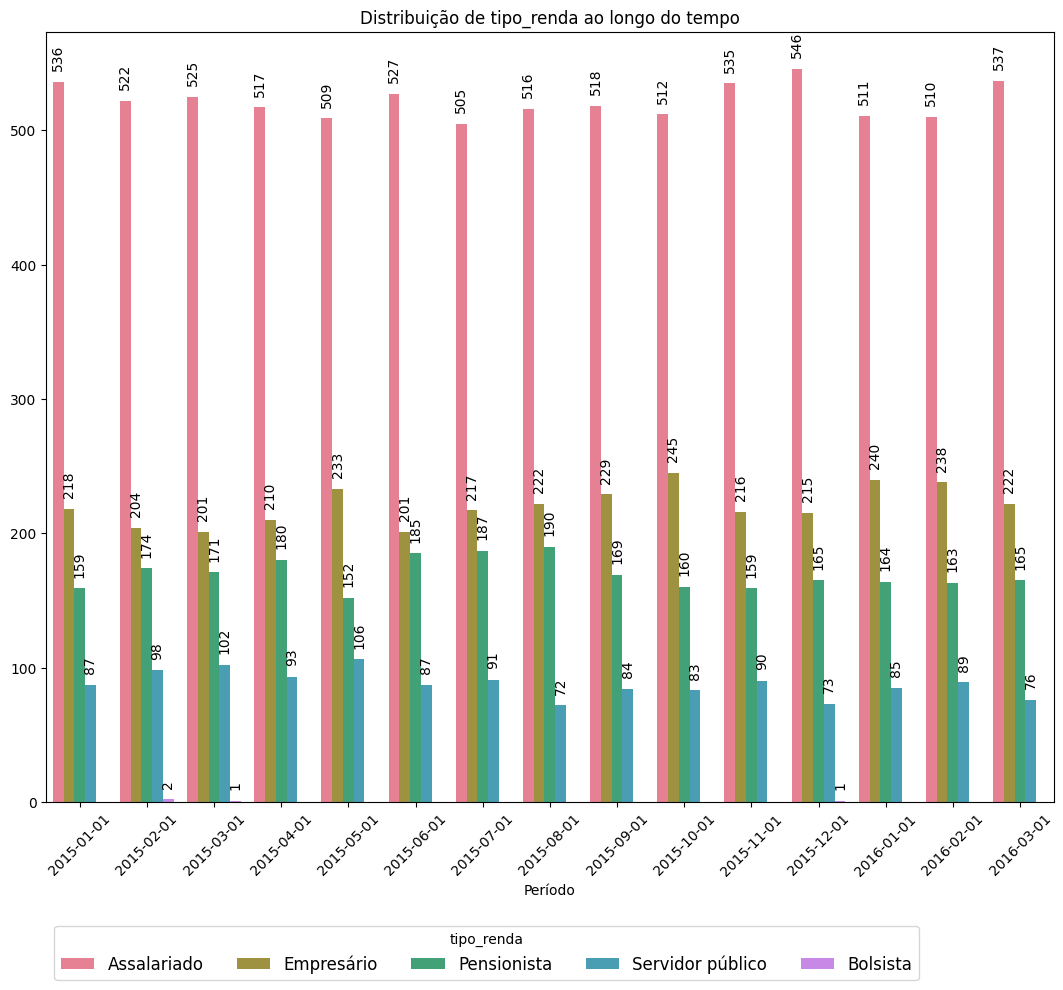

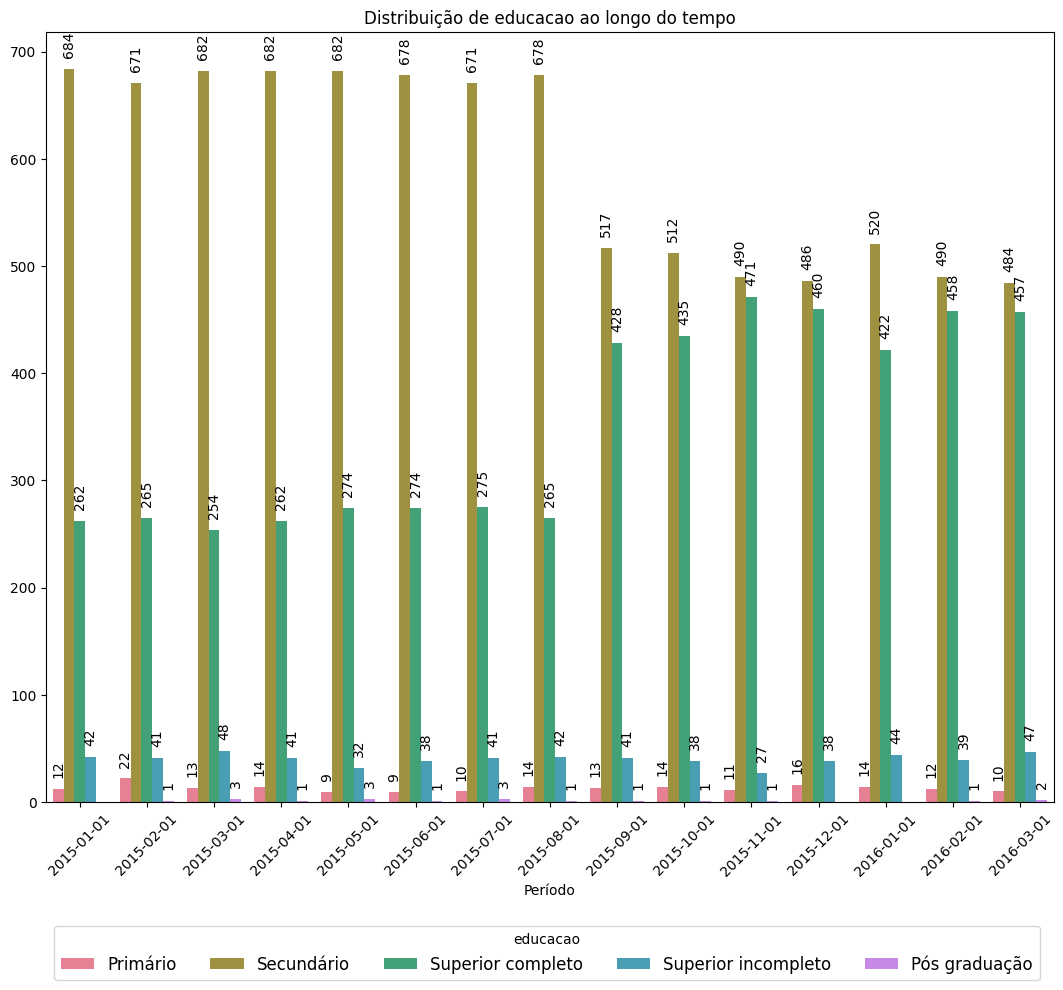

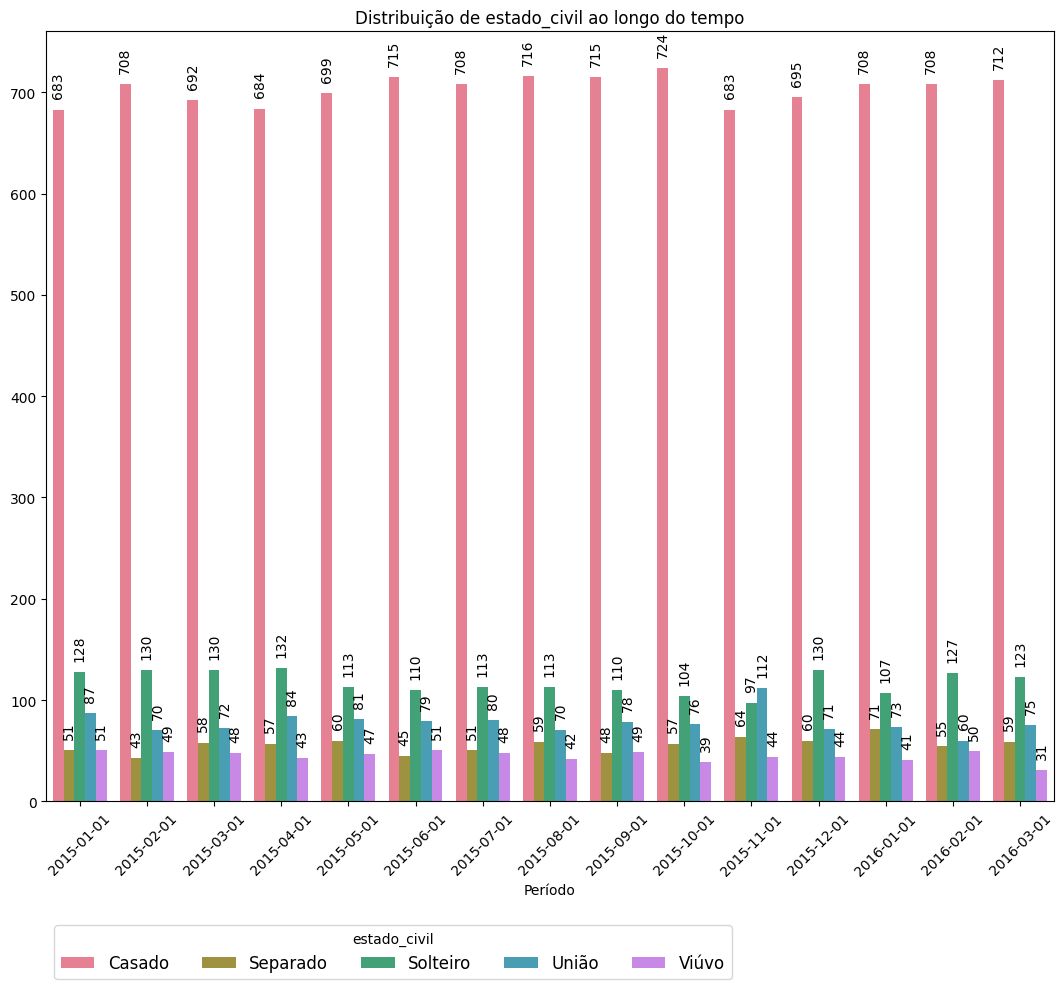

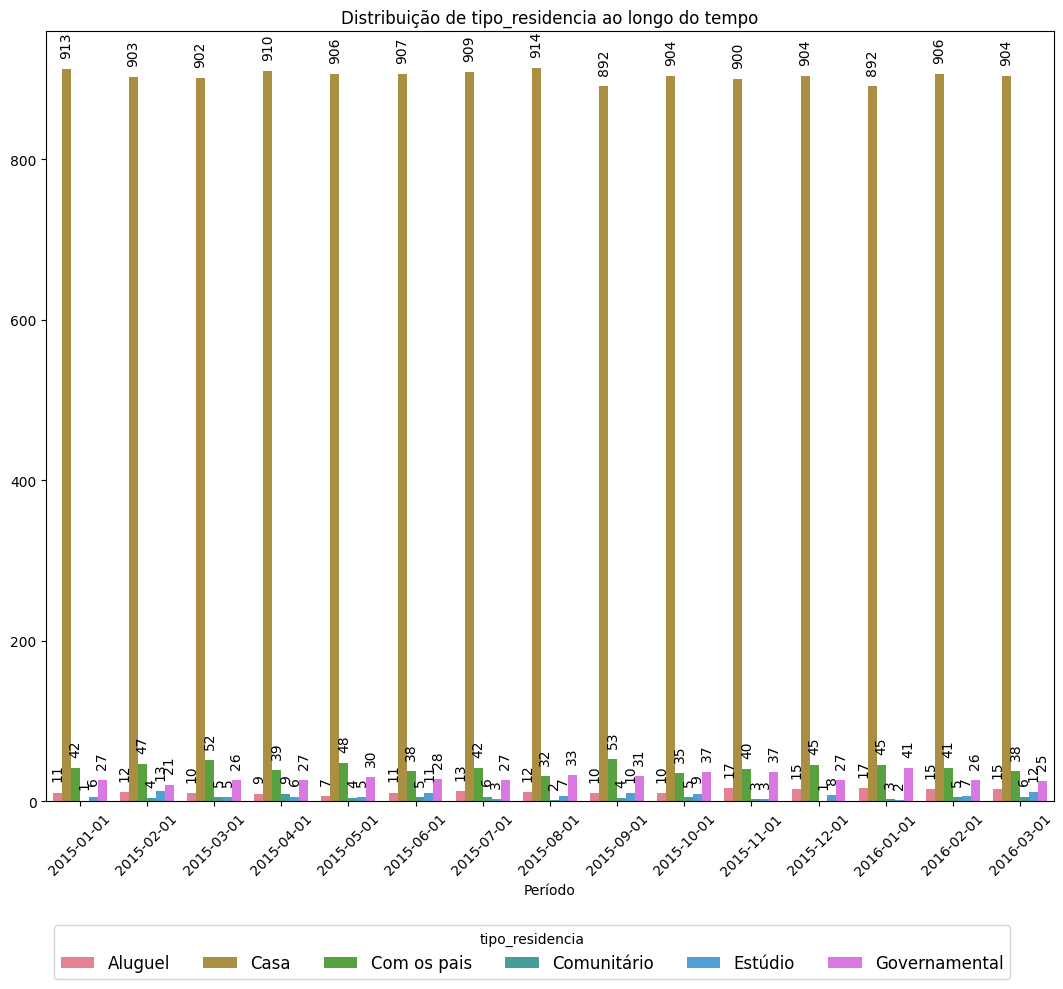

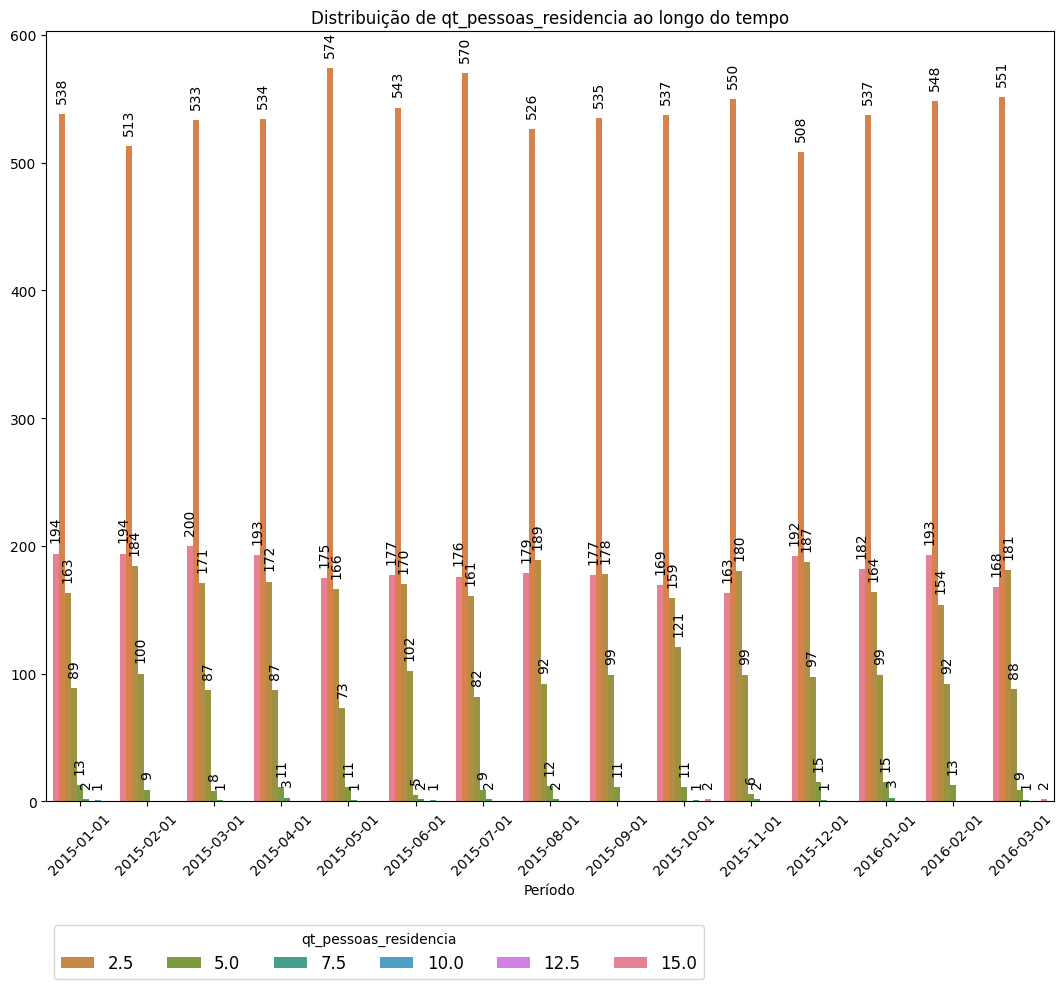

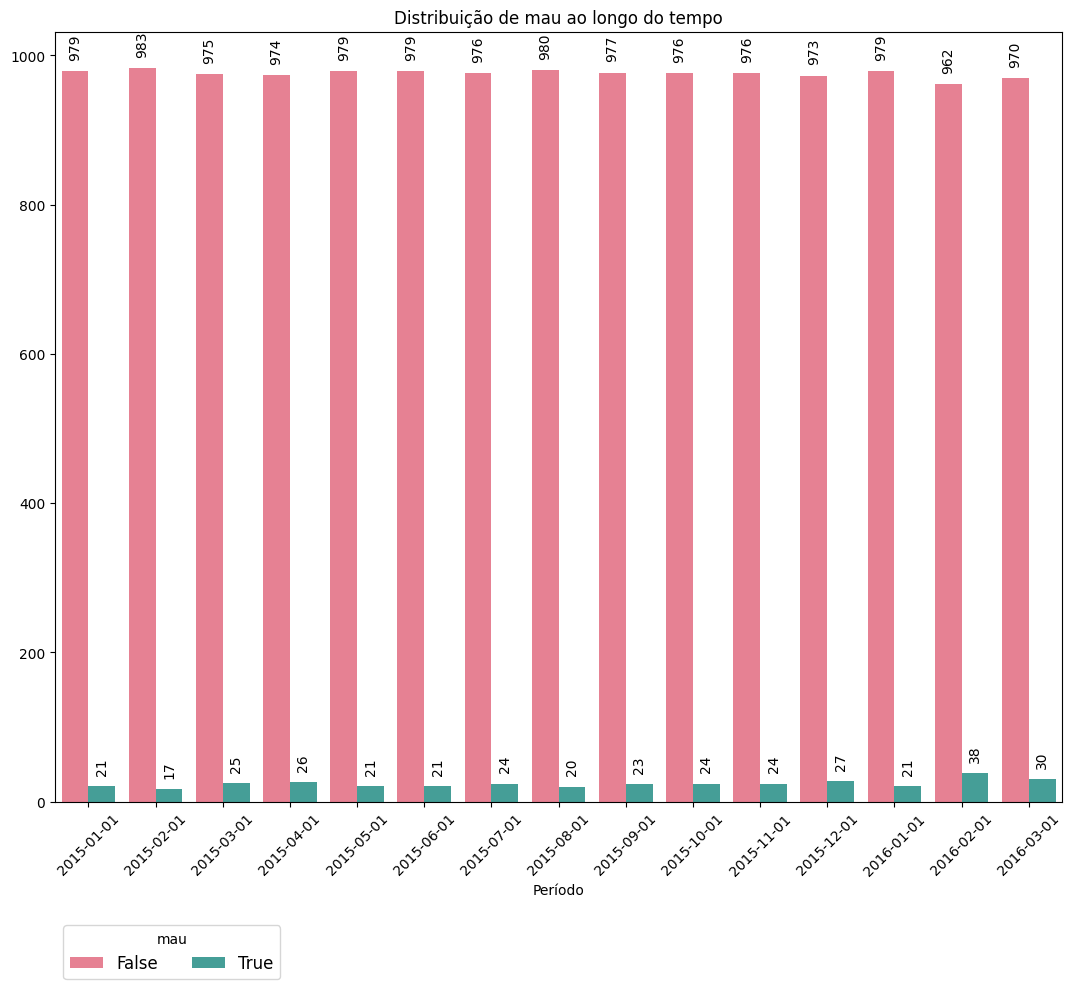

In [8]:
# Definindo as variáveis quantitativas e qualitativas
quantitative_vars = ['idade', 'tempo_emprego', 'renda']  # Várias variáveis quantitativas
qualitative_vars = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 
                    'qt_pessoas_residencia', 'mau']

# Criando gráficos de barras
for var in qualitative_vars:
    plt.figure(figsize = (13, 10))
    
    # Contando as ocorrências por data e pela variável qualitativa
    renda_counts = renda.groupby(['data_ref', var]).size().reset_index(name = 'count')
    
    # Criando o gráfico e armazenando as barras
    bars = sns.barplot(data=renda_counts, x = 'data_ref', y = 'count', hue = var, errorbar = None, palette = 'husl')
    
    # Adicionando rótulos de contagem no centro das barras
    for container in bars.containers:  # Iterar sobre todas as containers (para múltiplas categorias)
        plt.bar_label(container, padding=8, rotation = 90)
    
    plt.title(f'Distribuição de {var} ao longo do tempo')
    plt.xticks(rotation = 45)
    plt.xlabel('Período')
    plt.ylabel('')
    plt.legend(loc = 2, bbox_to_anchor = (0, -0.15), ncol = 6, fontsize = 'large', title=var)
    
    plt.show()

Ao longo dos meses apresentados percebe-se uma variação muito pequena na apresentação de quase todos os dados qualitativos apresentados, essas variações observadas podem ser consideradas variações sazionais, notando-se uma soimilaridade entre os dados ilustrados. 
A excessão para essa regra é notada para a variável relacionada a educação em que entre os meses de agosto e setembro de 2015 há um decréscimo mais acentuado dos secundaristas, paralelo a um acréscimo similar dos cliente com curso de graduação completo. 

Uma característica interessante a ser verificada entre as variáveis de posse um aumento proporcional a redução de Falsos e Verdadeiros, durante os meses.

Esses dados são bons para entendimento da s variáveis uma vez que acompanham logicas semelhantes ao longo tempo, representando um cenário muito bom para a modelagem.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

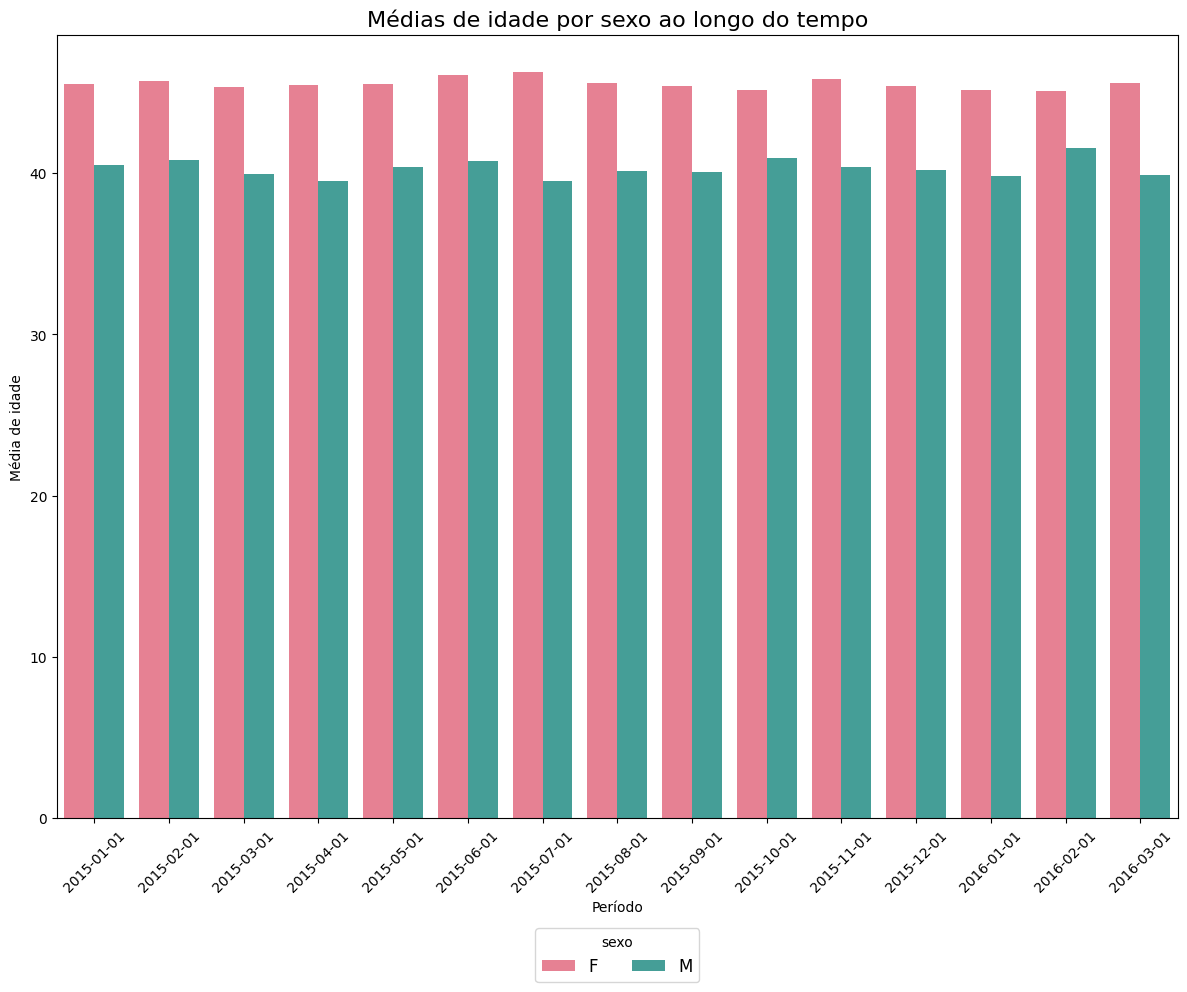

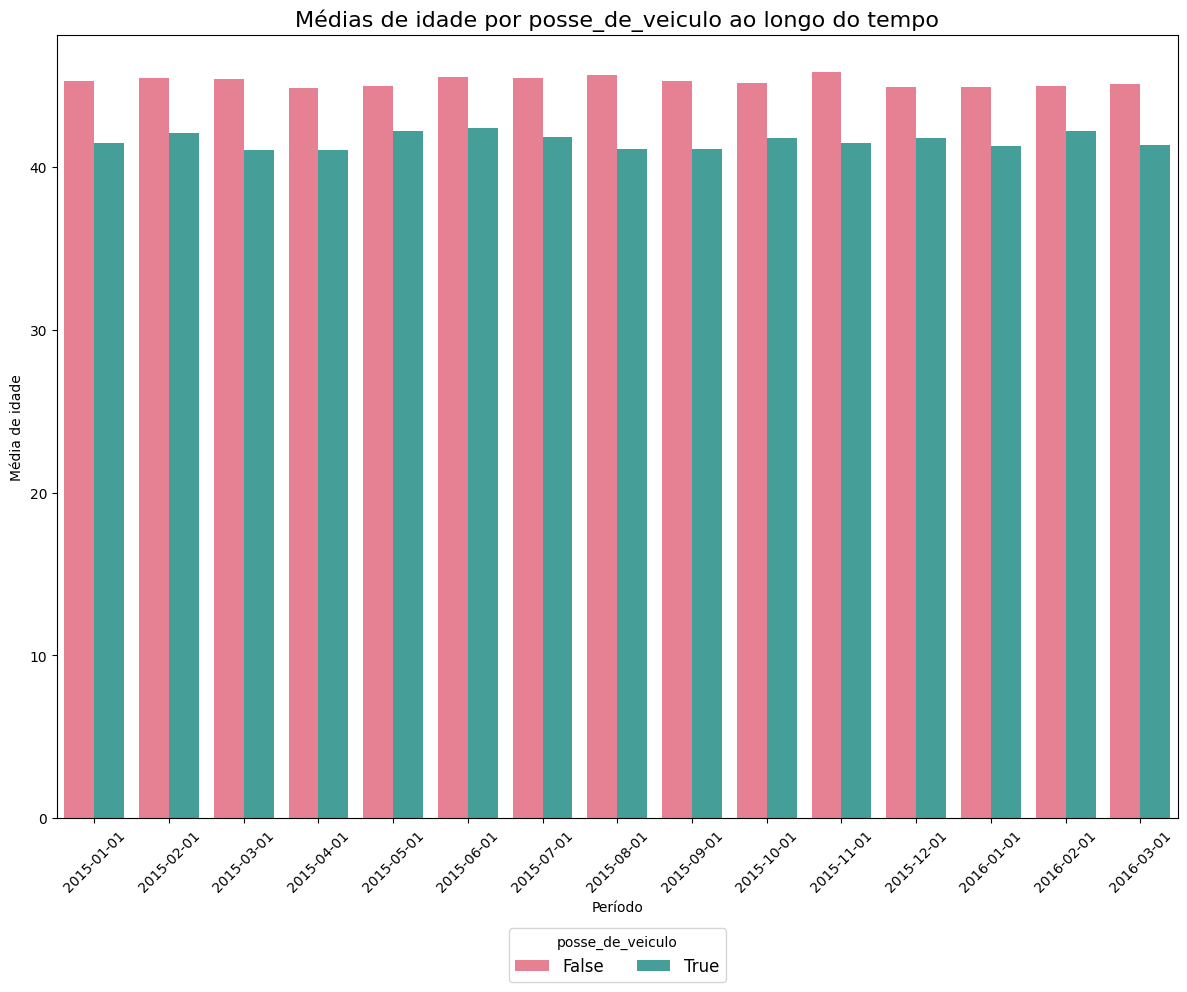

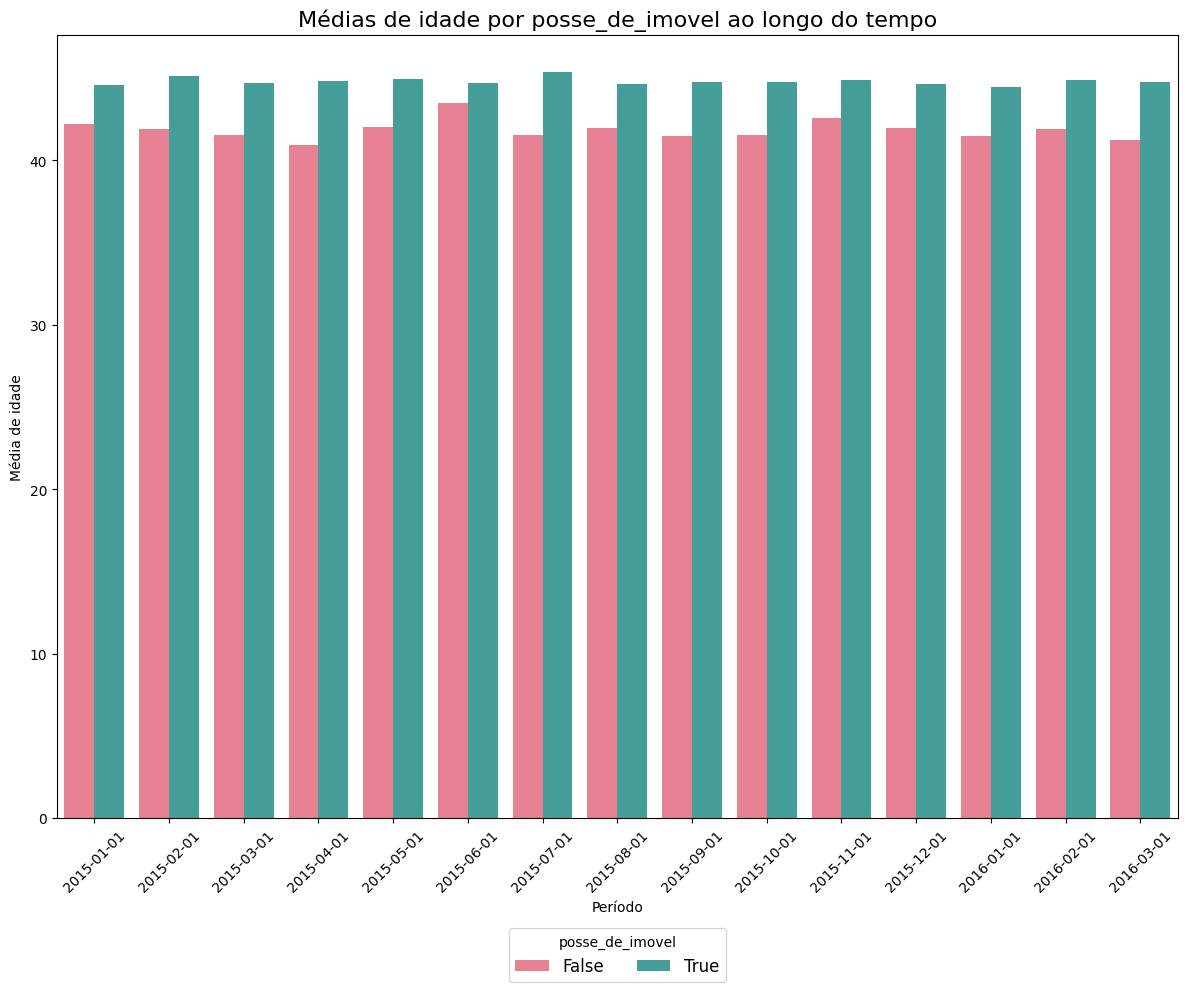

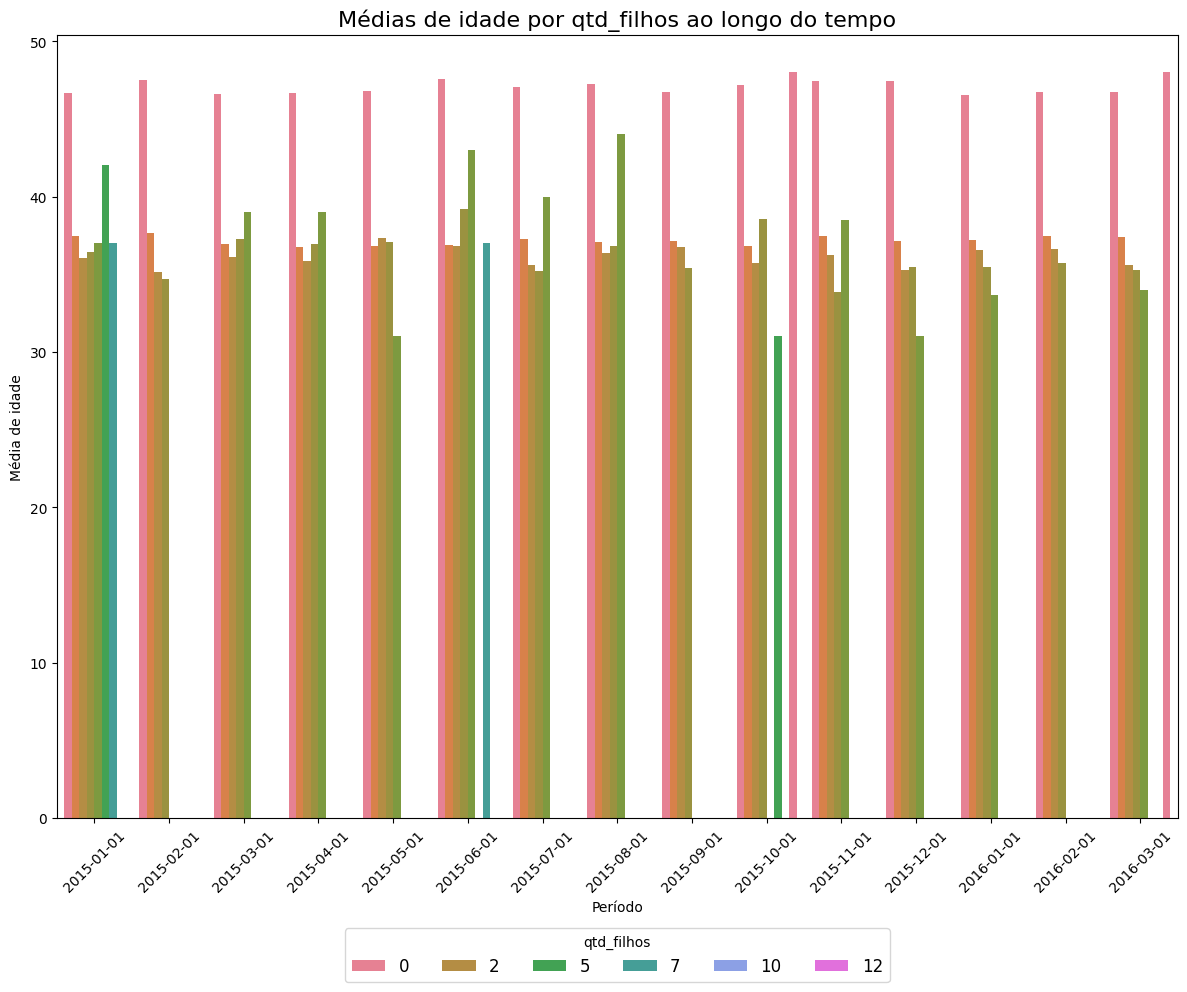

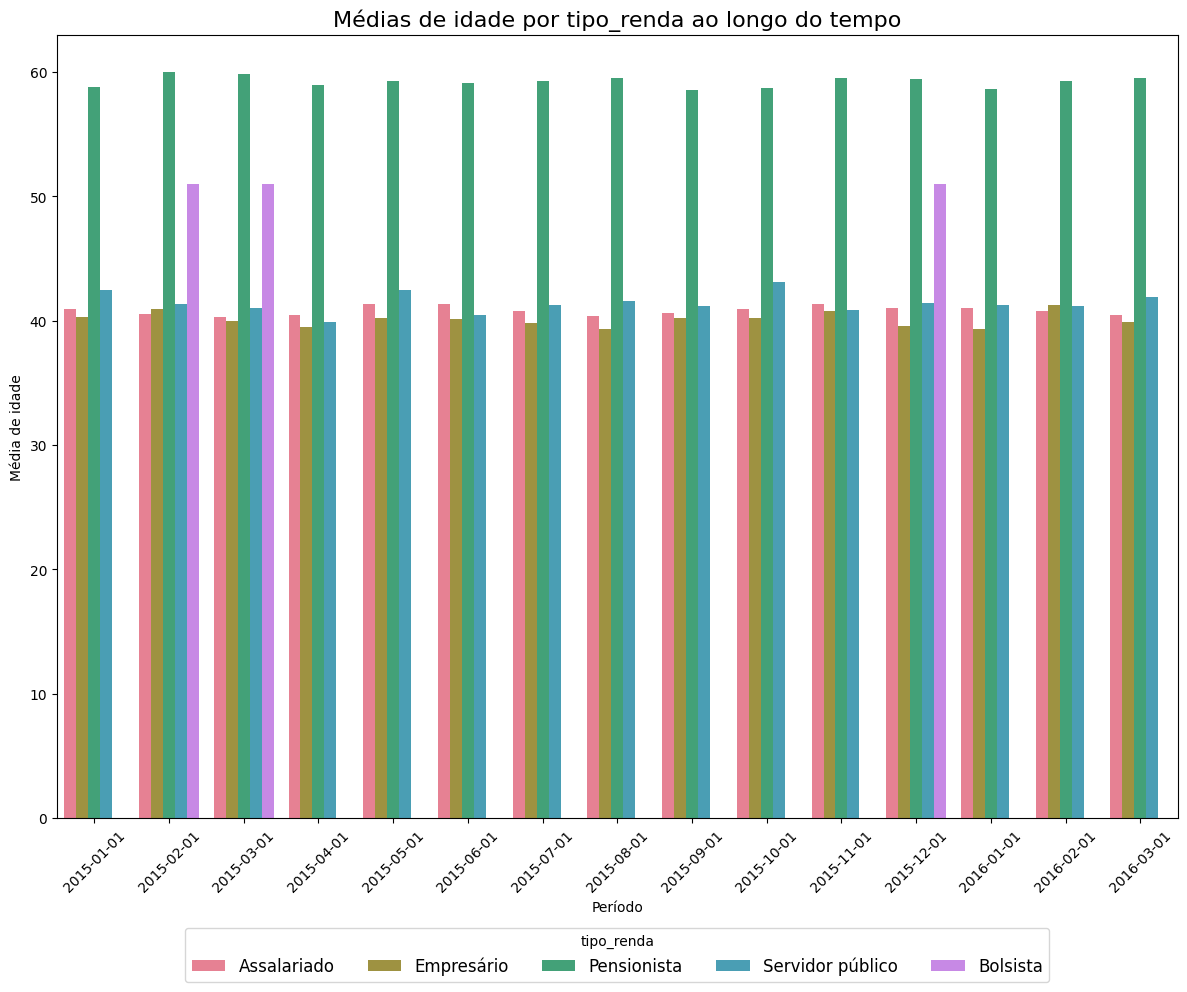

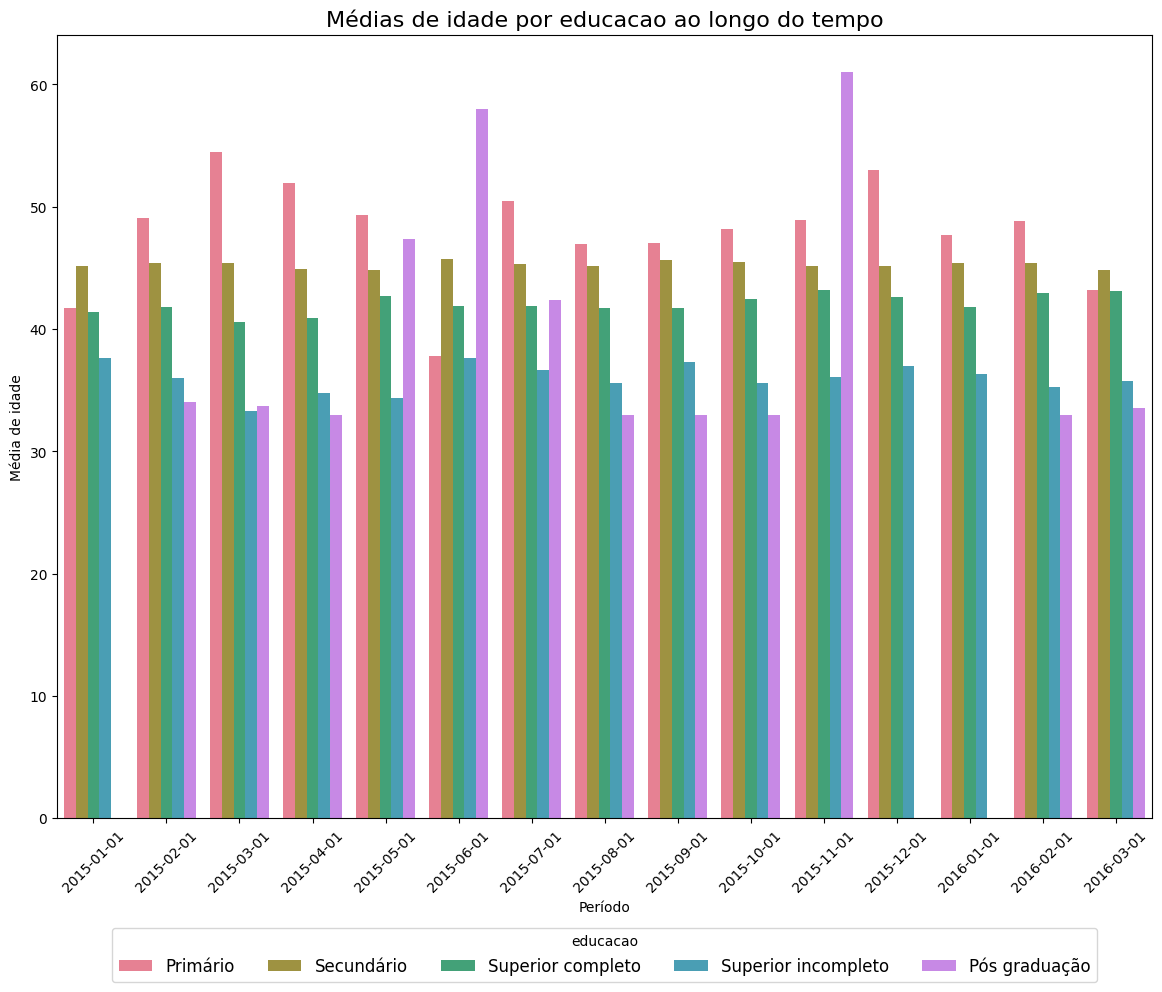

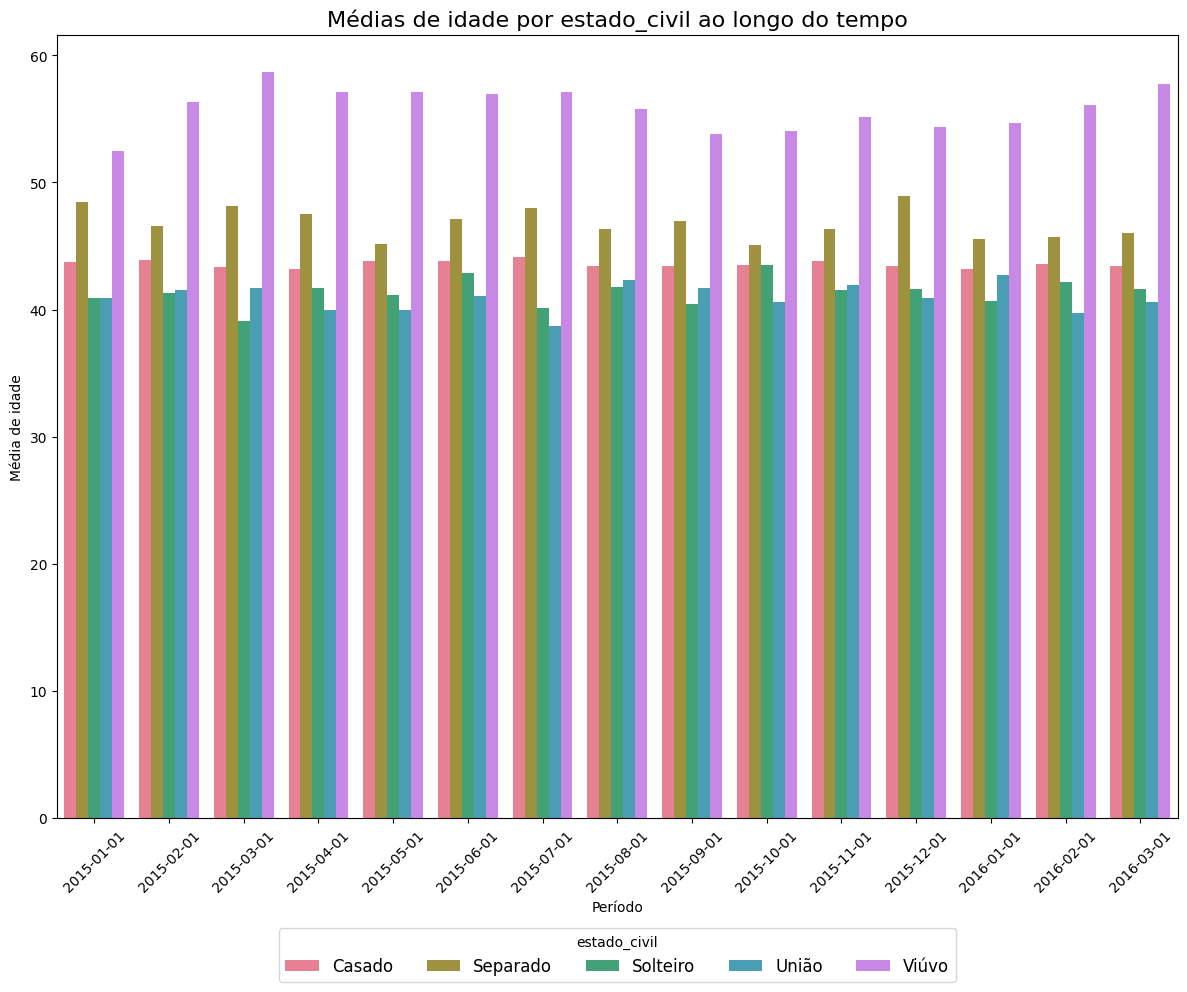

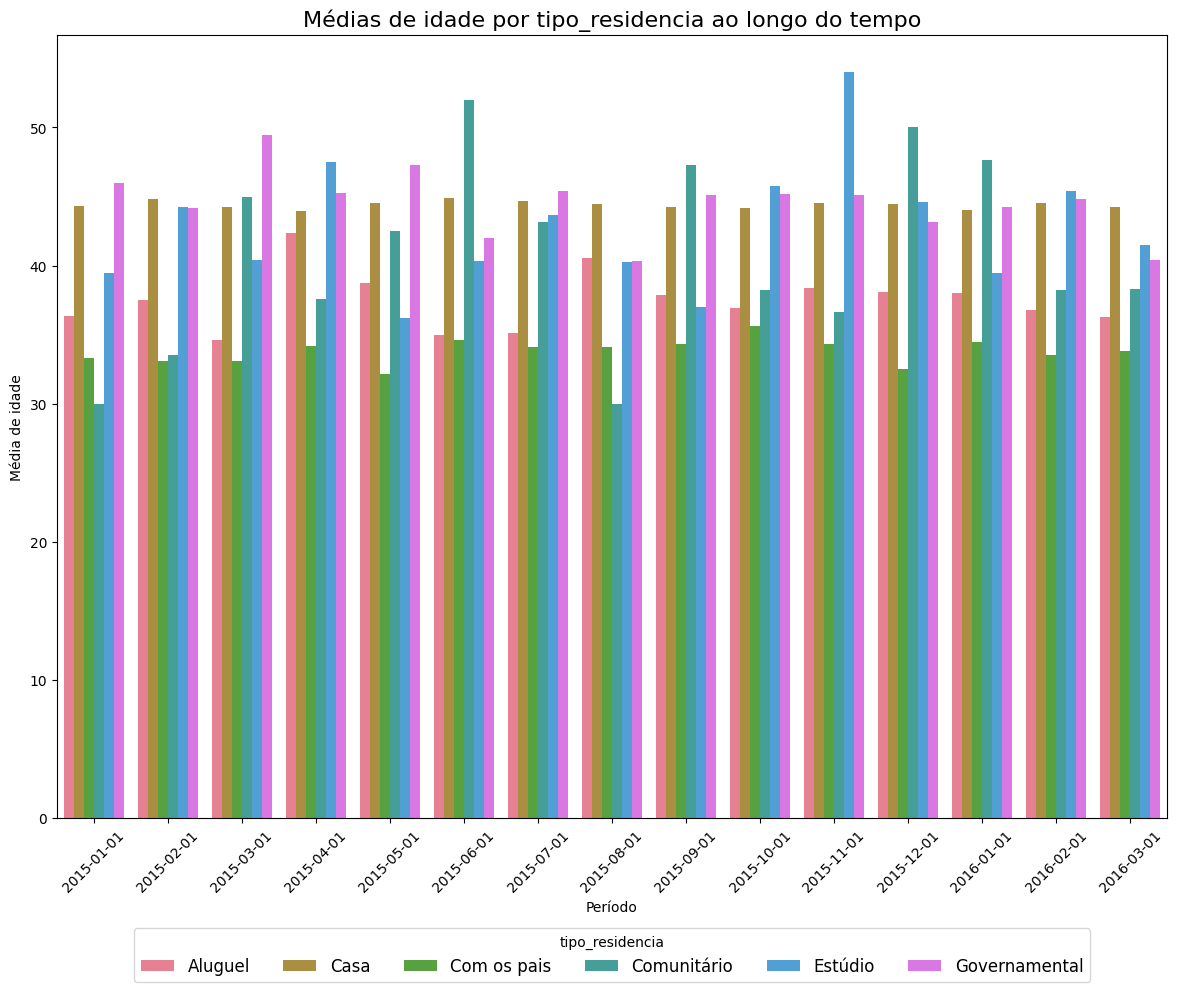

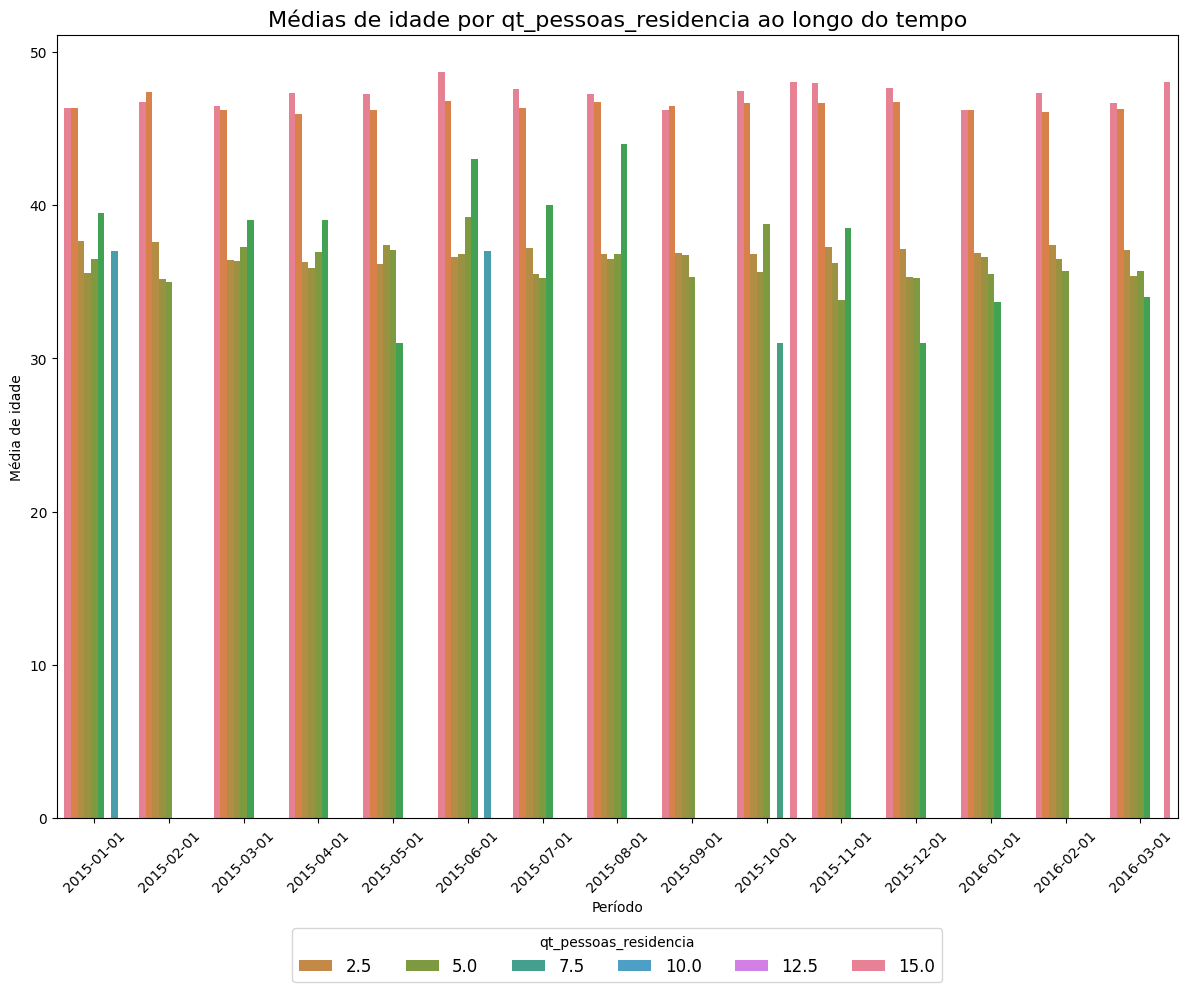

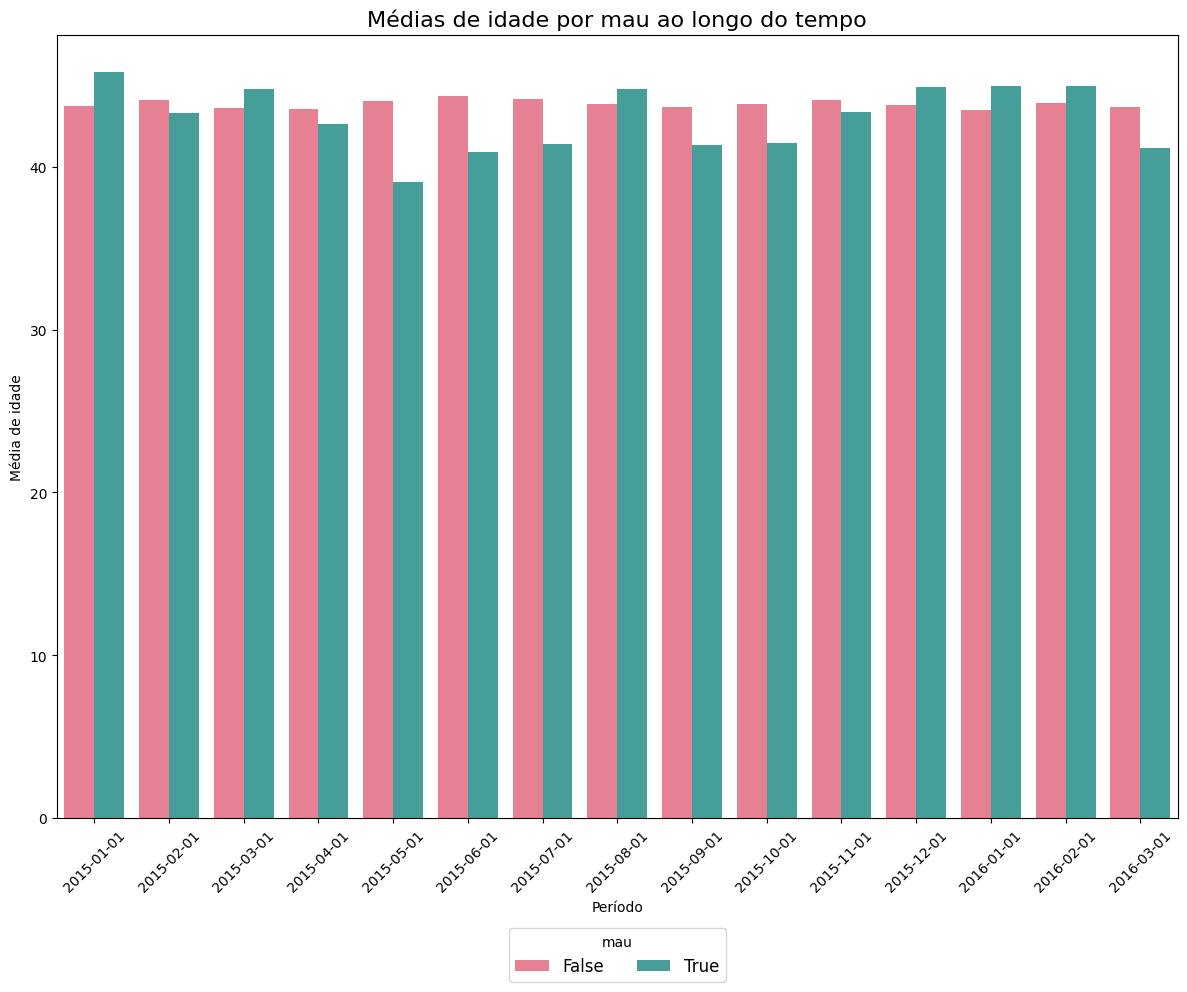

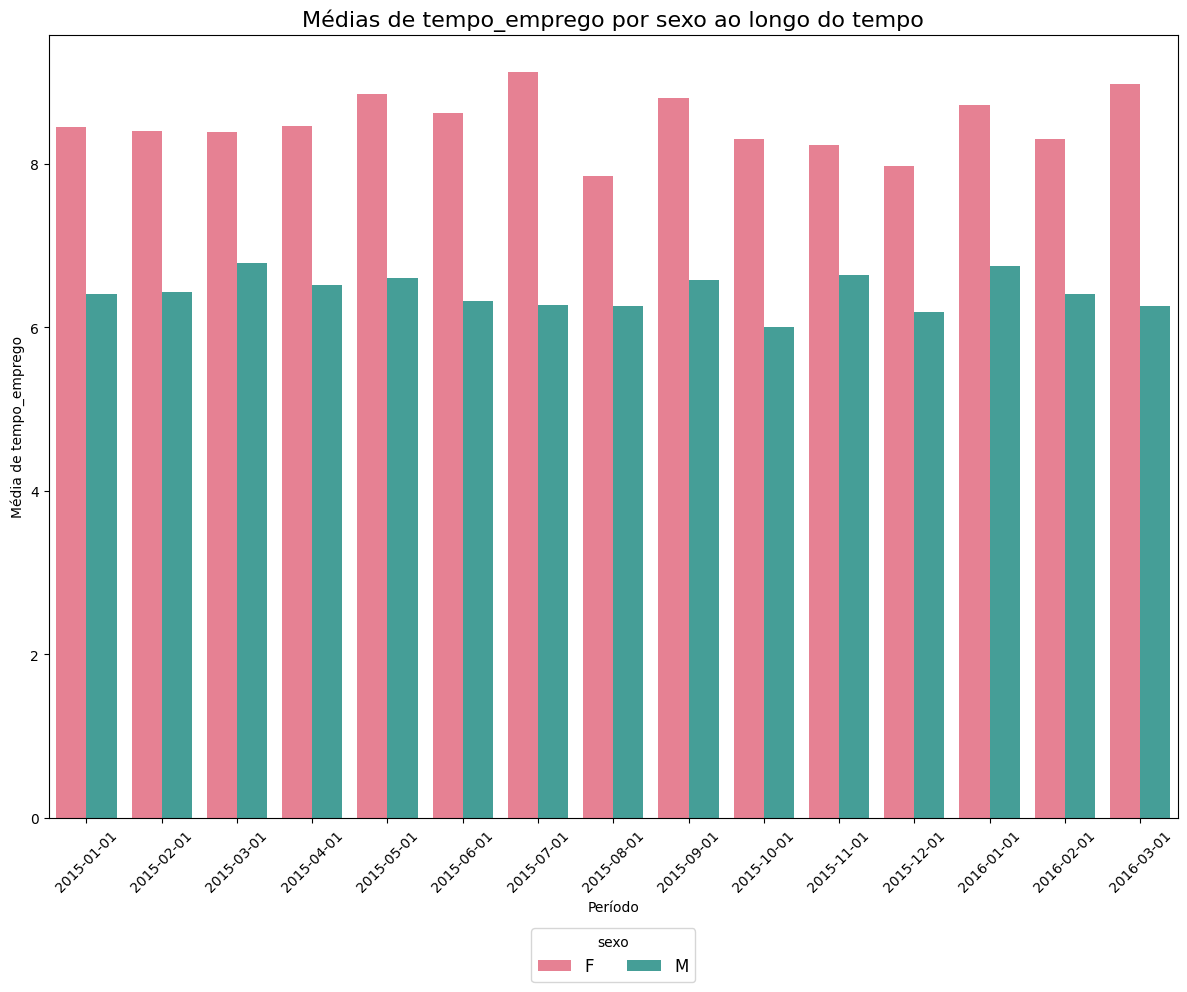

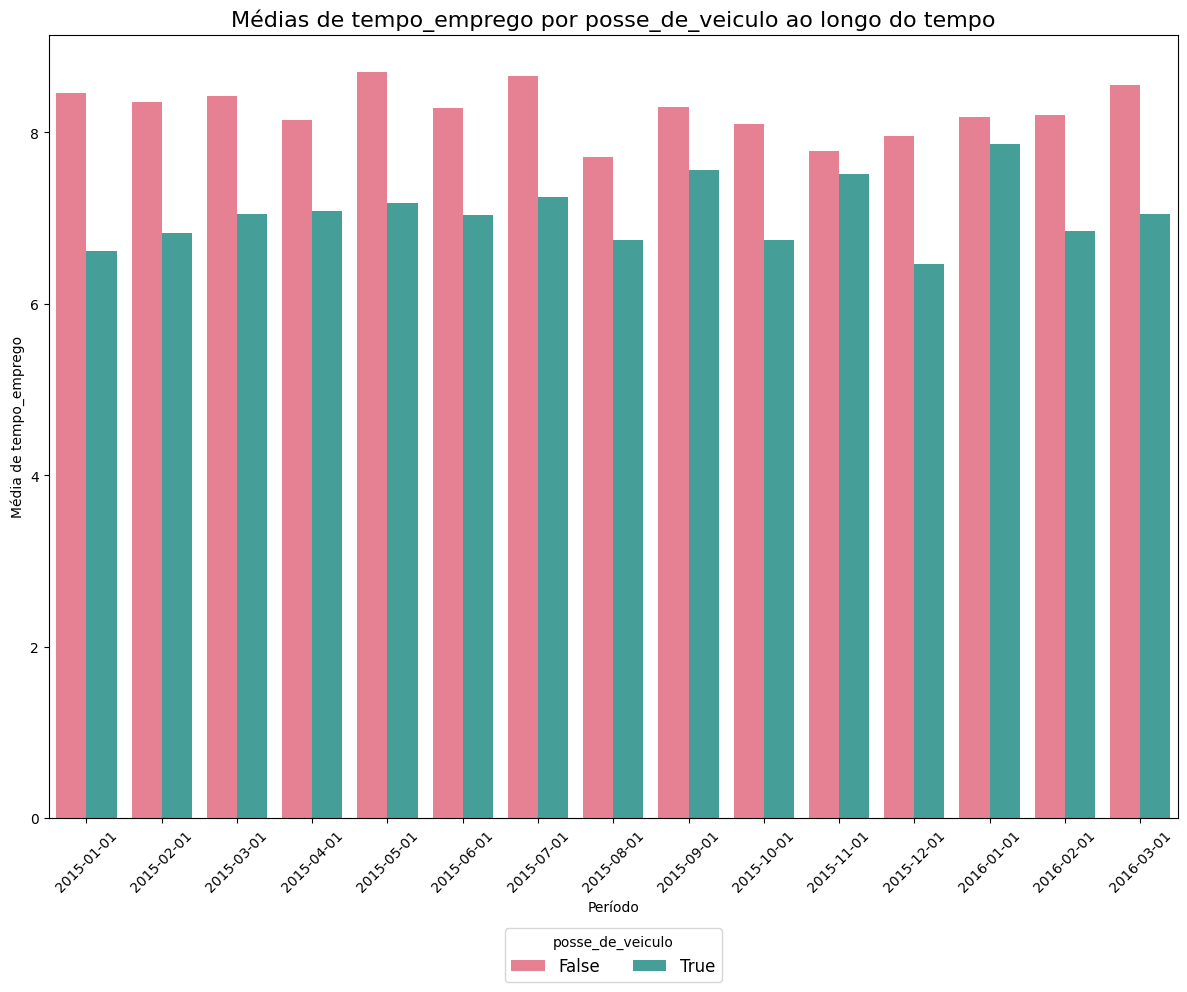

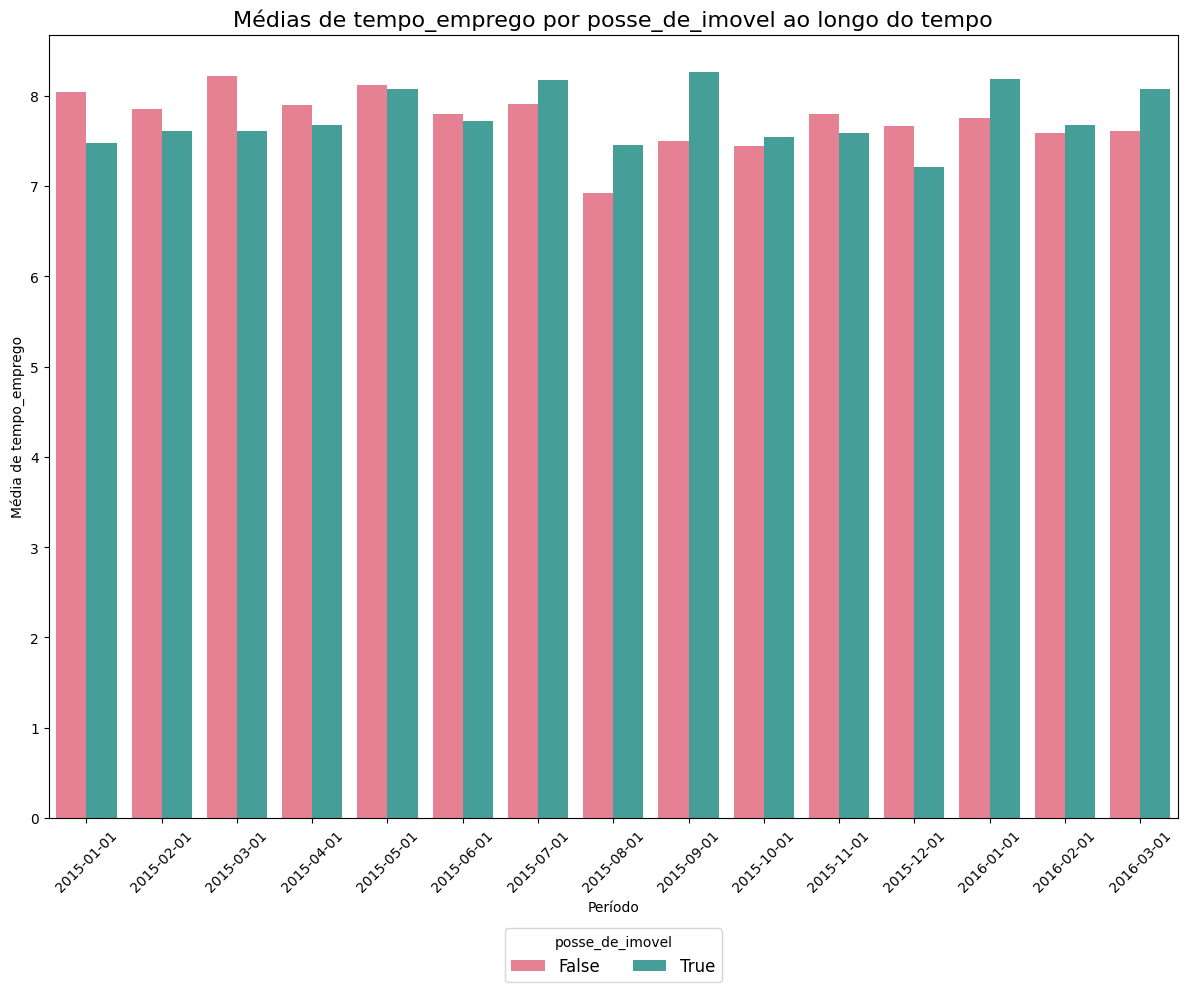

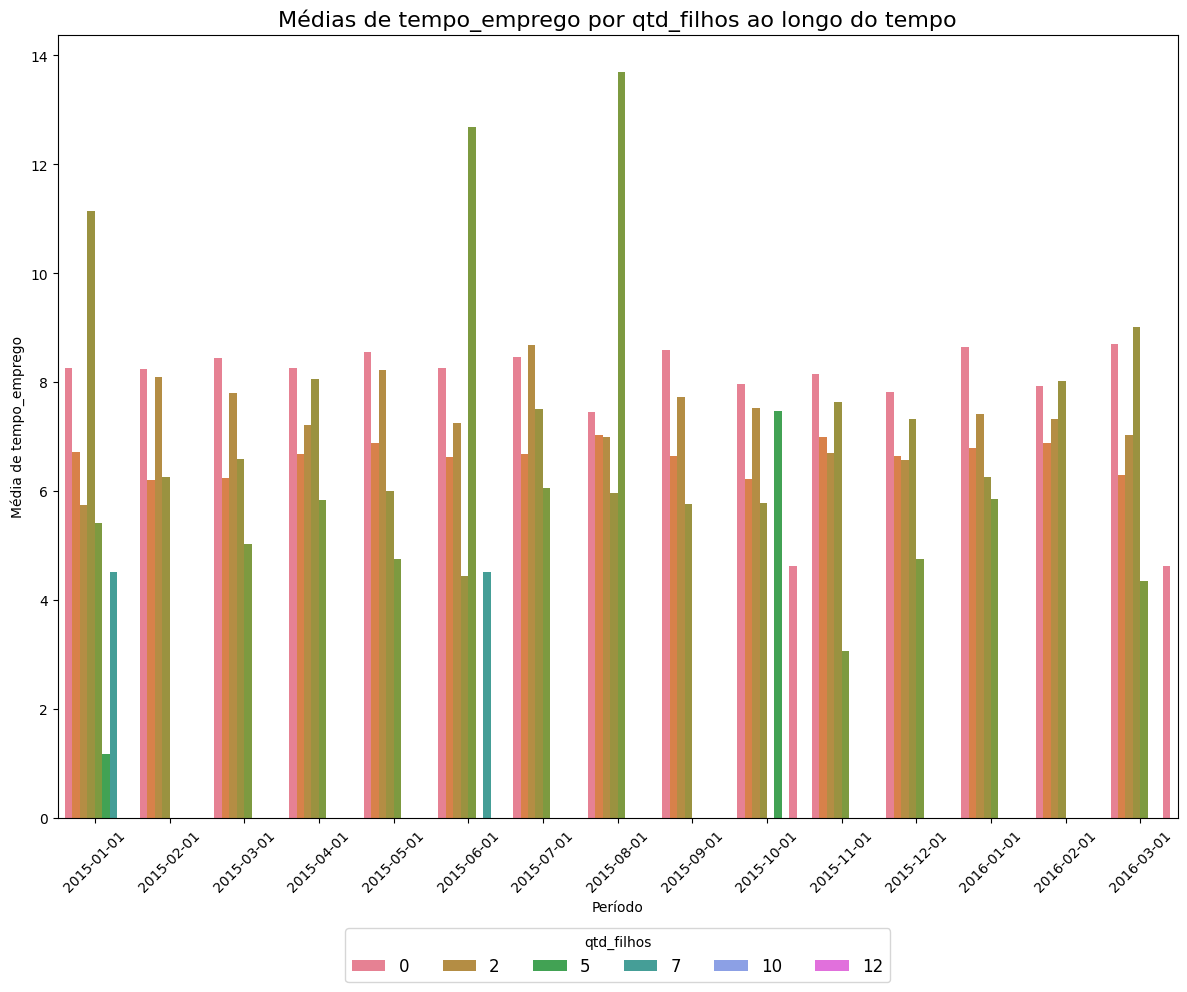

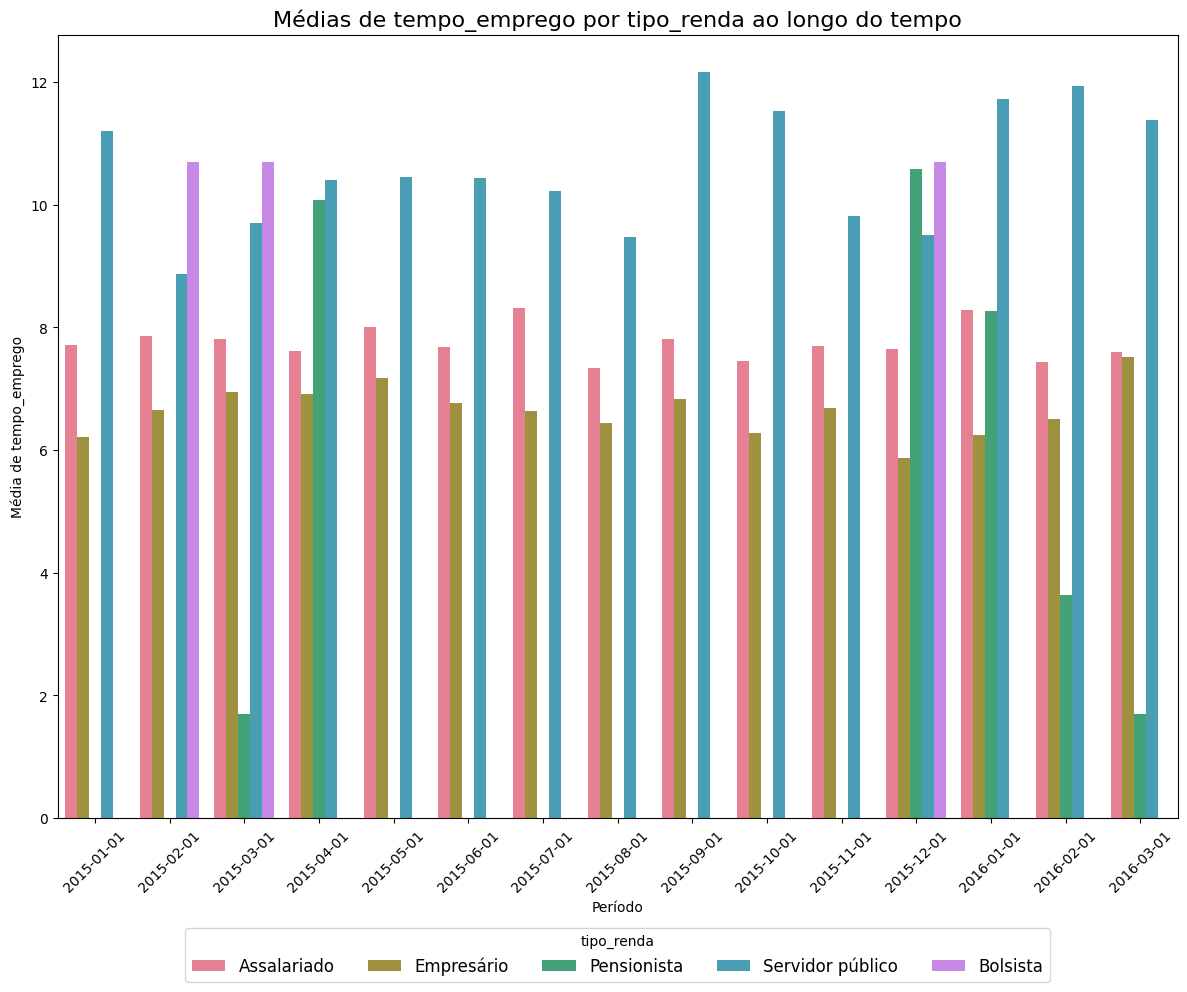

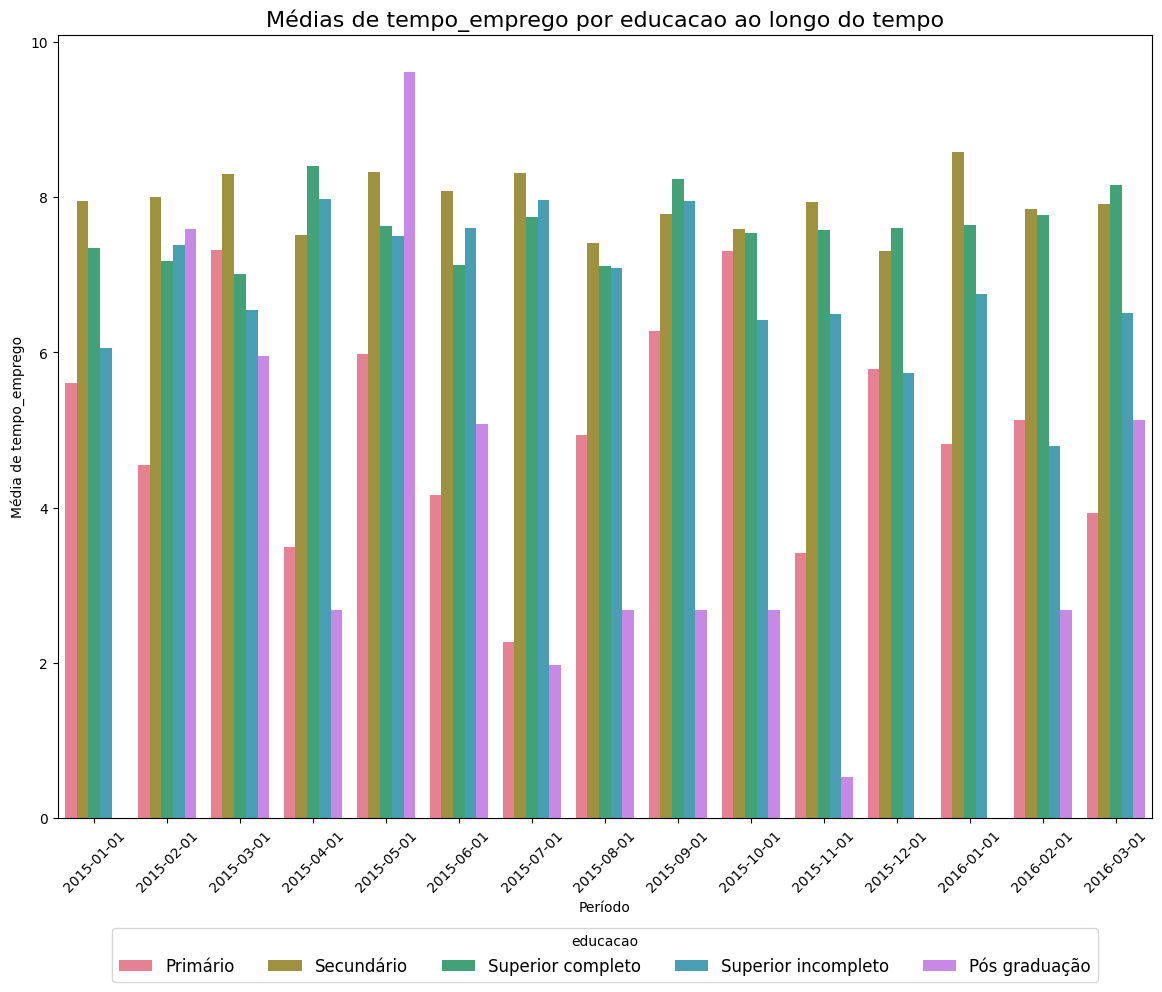

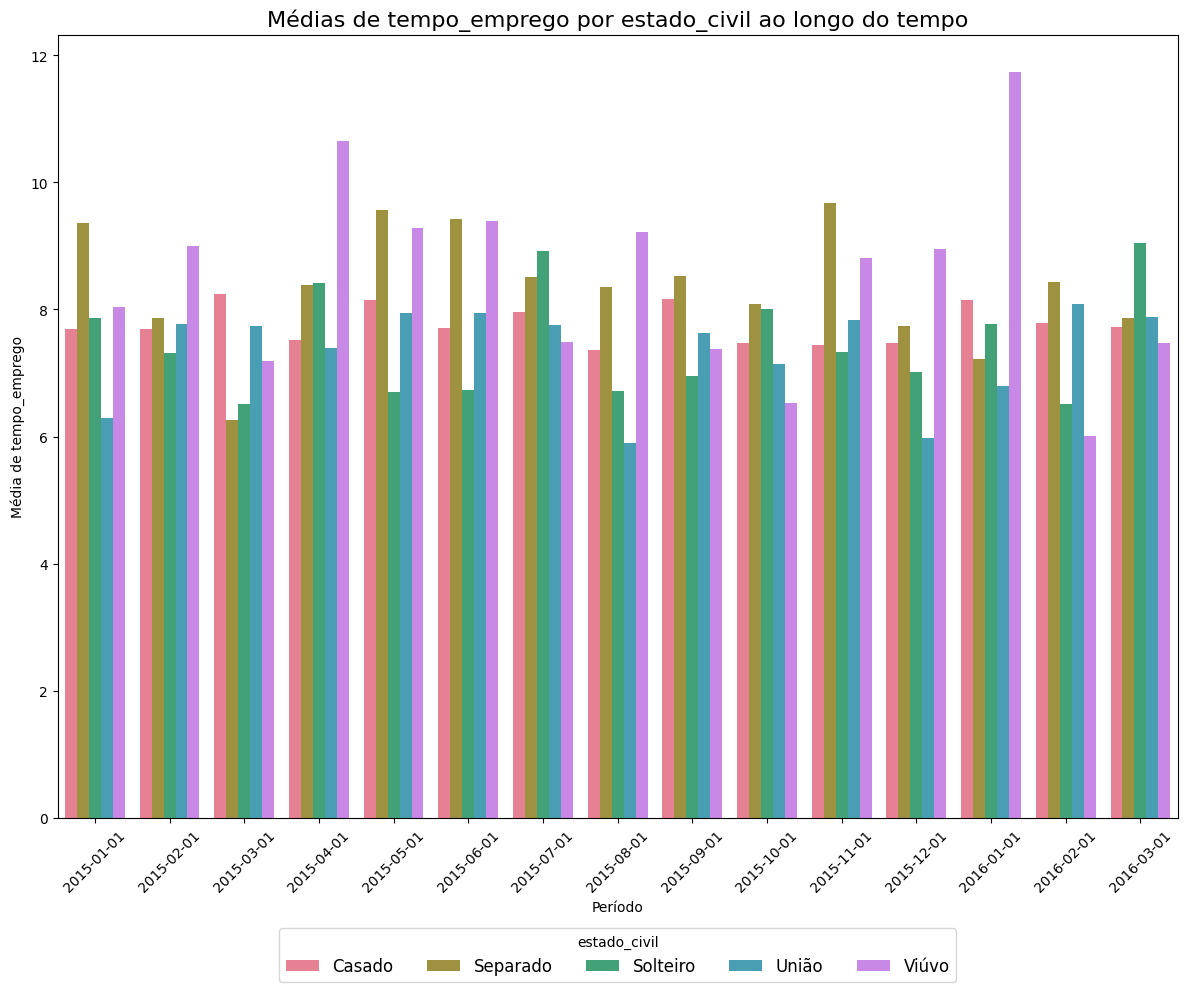

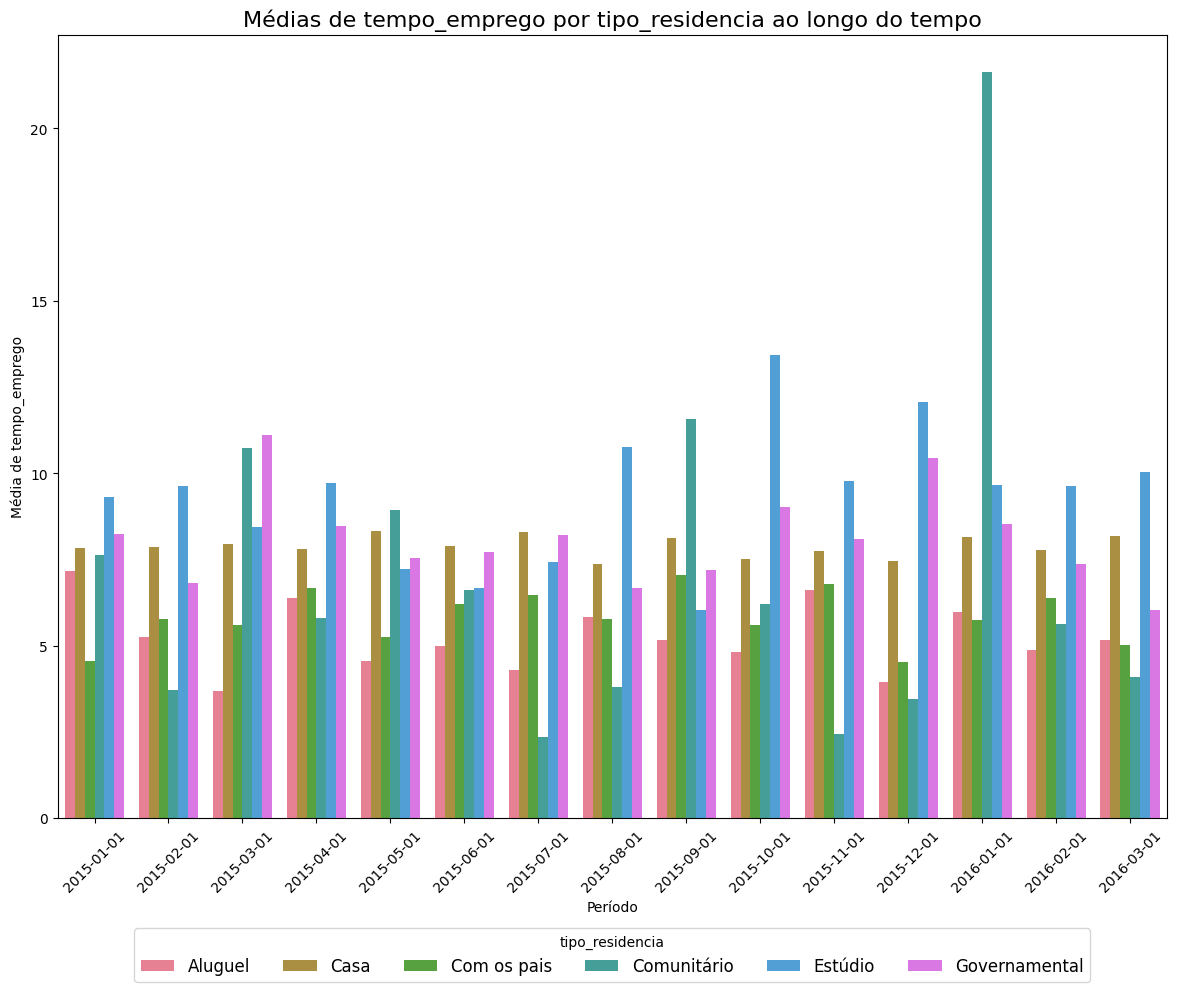

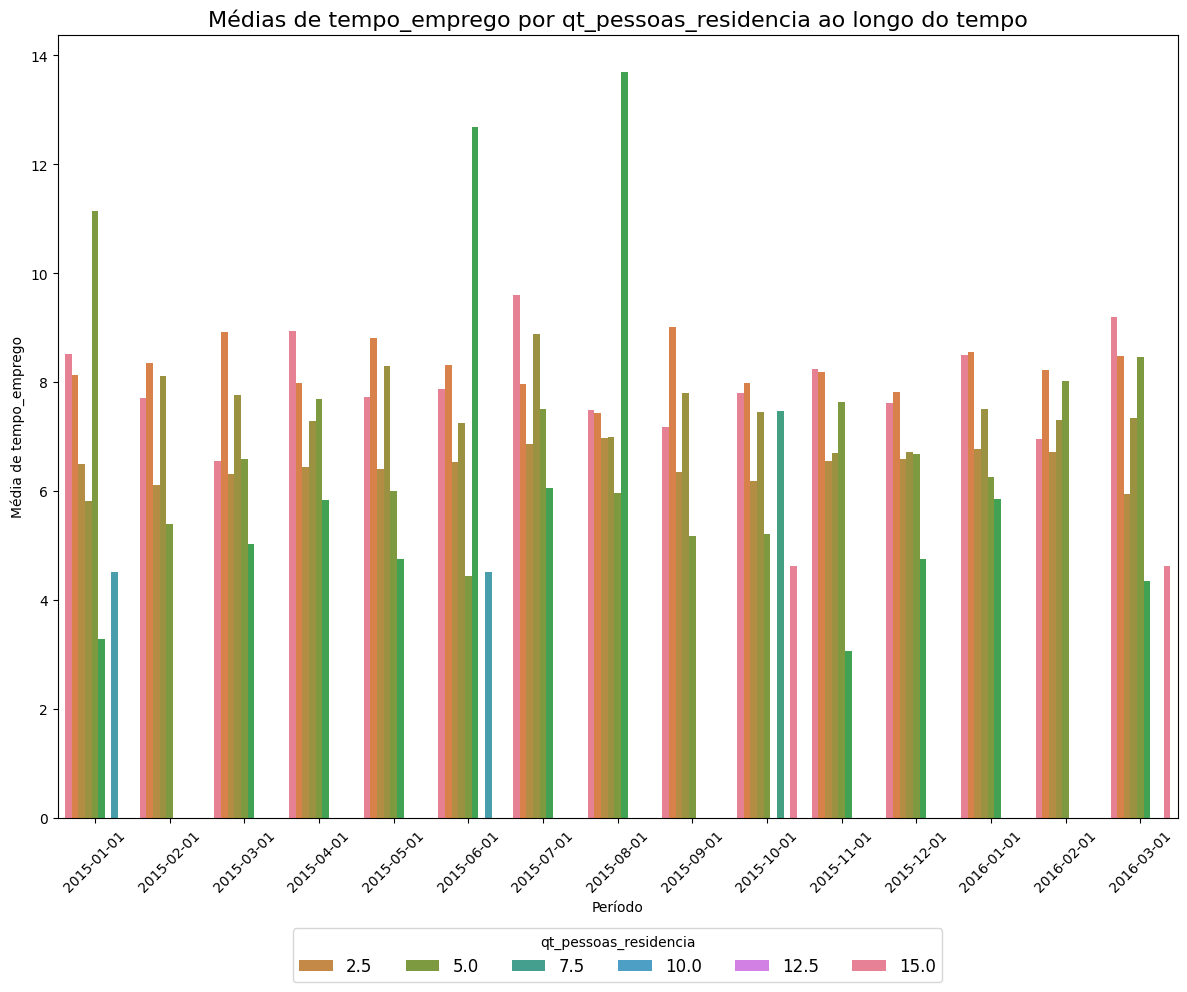

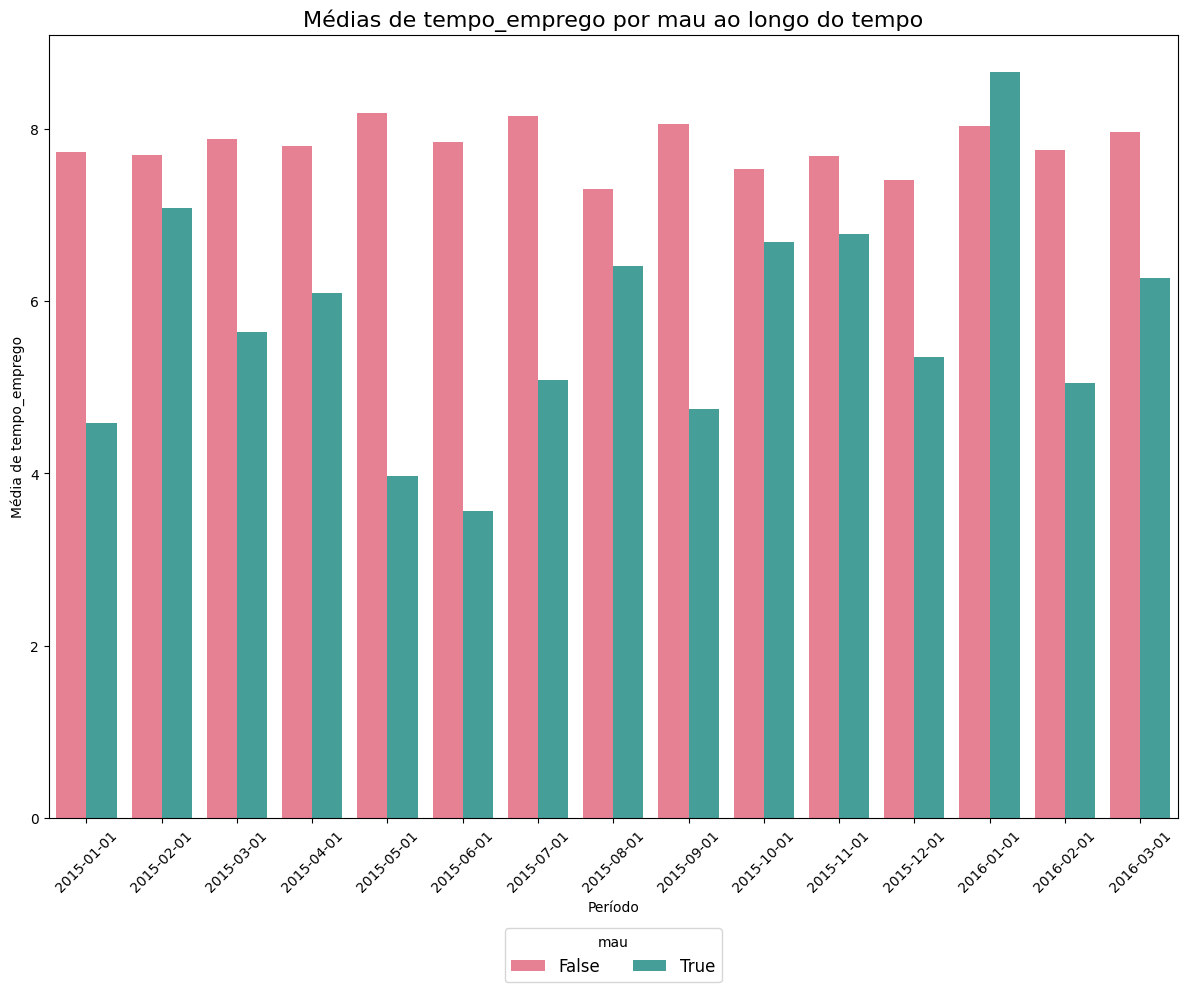

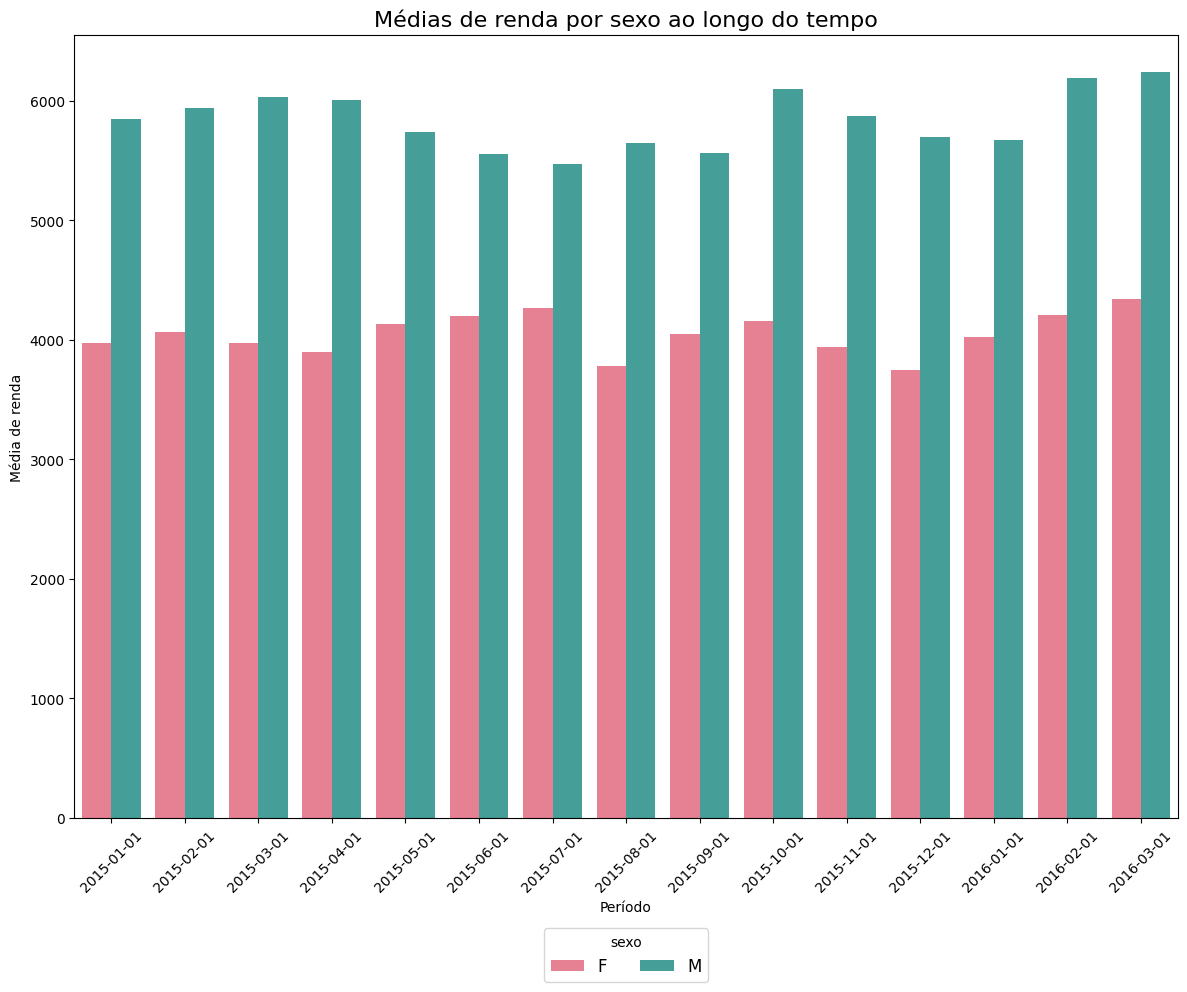

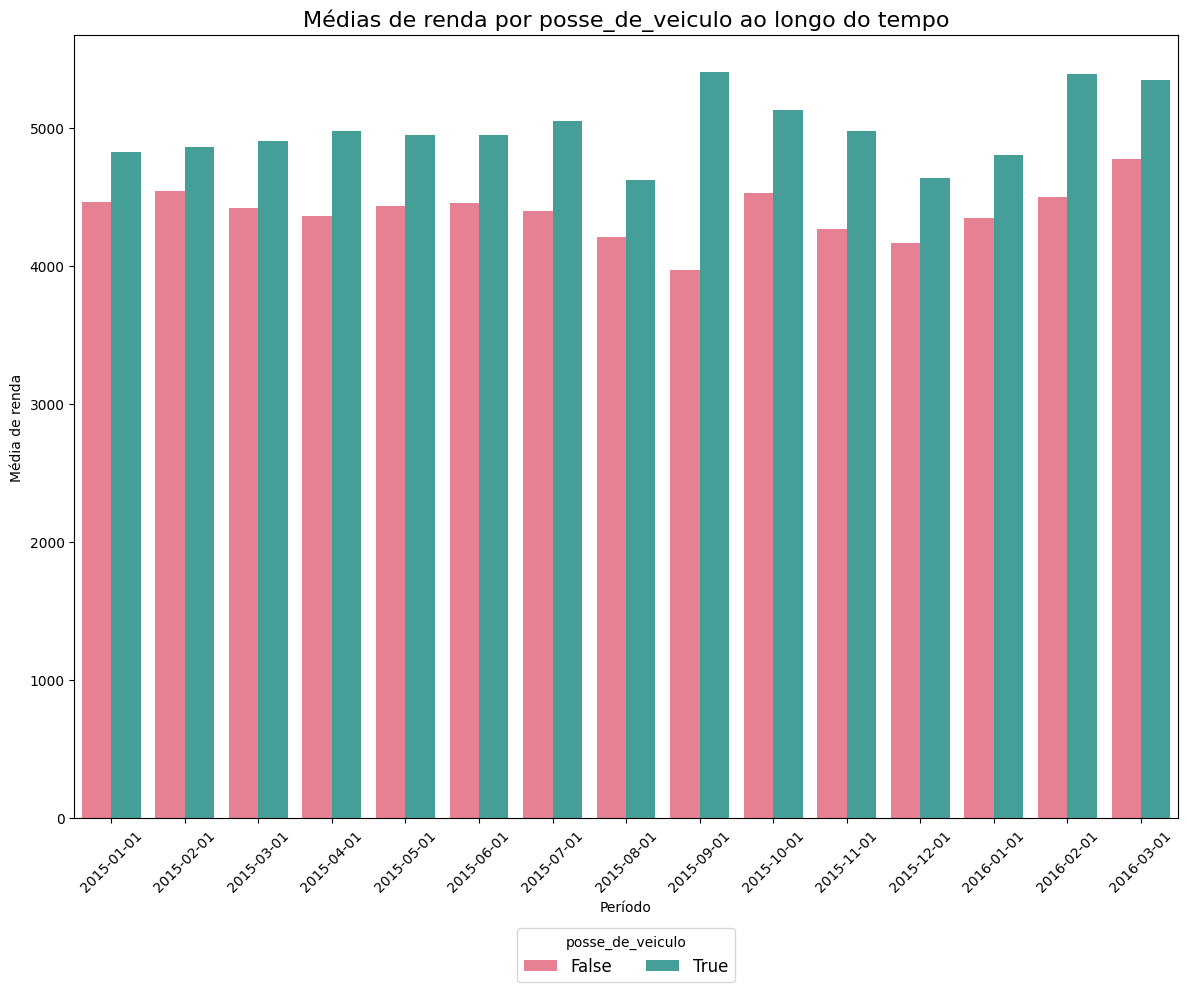

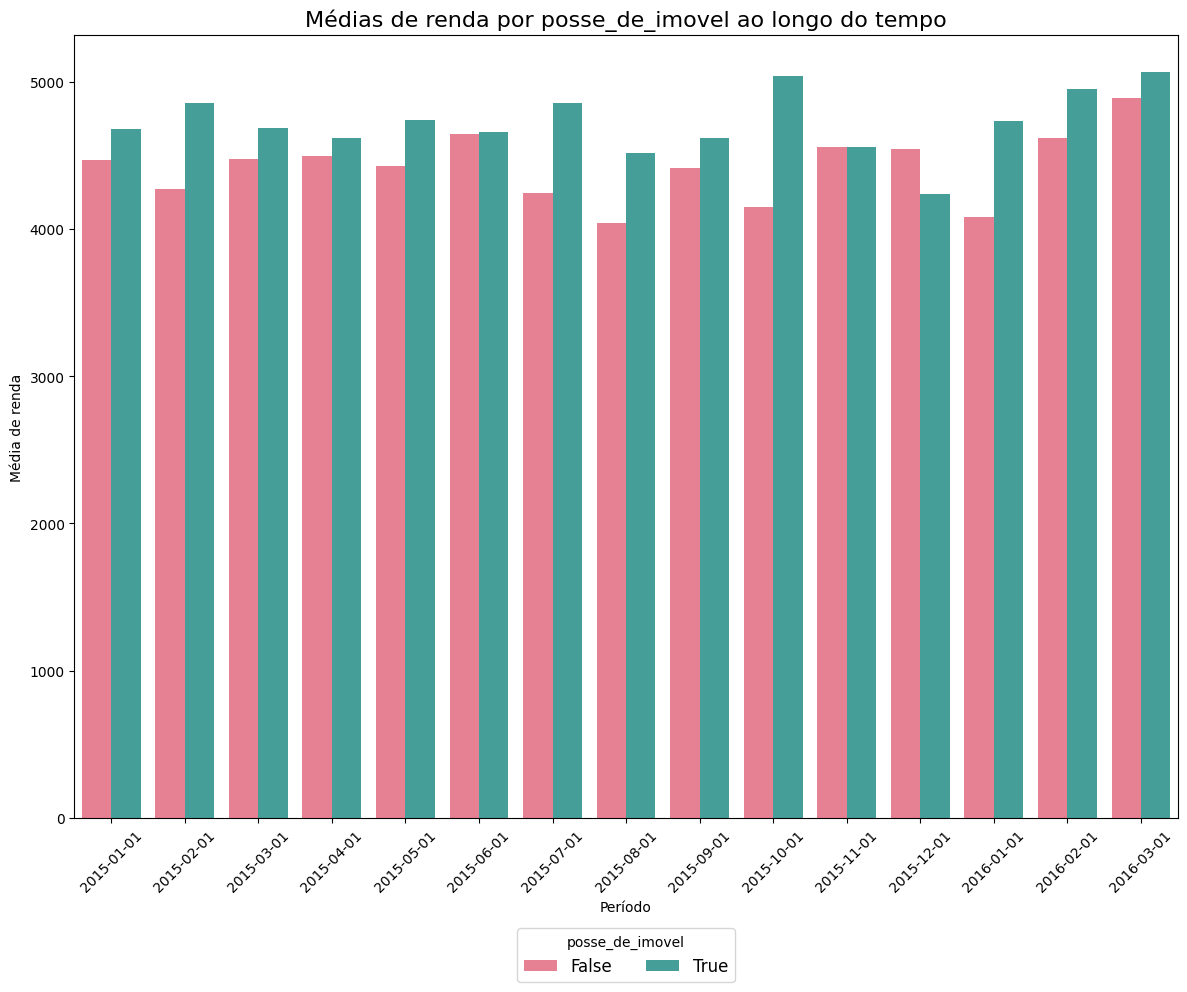

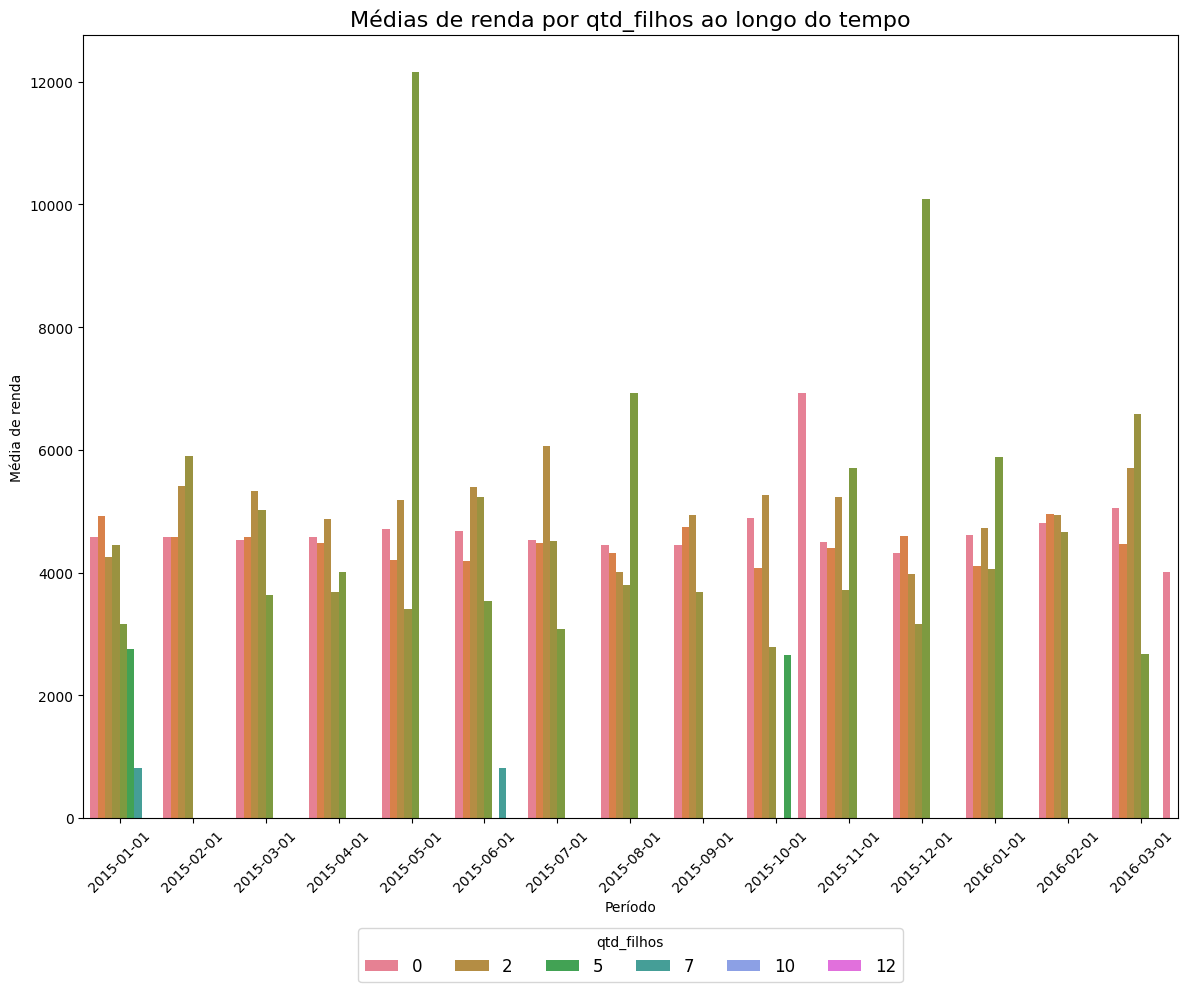

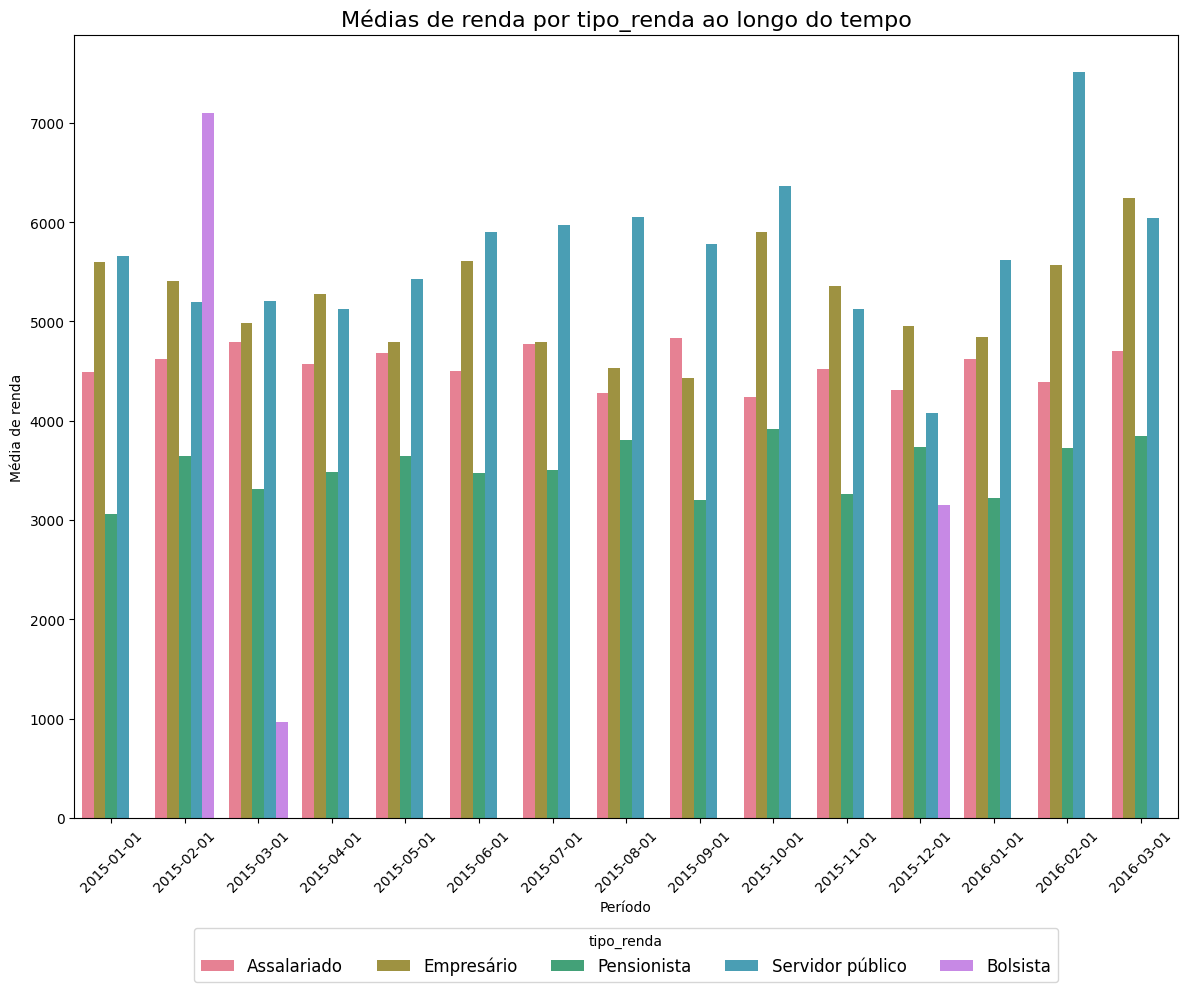

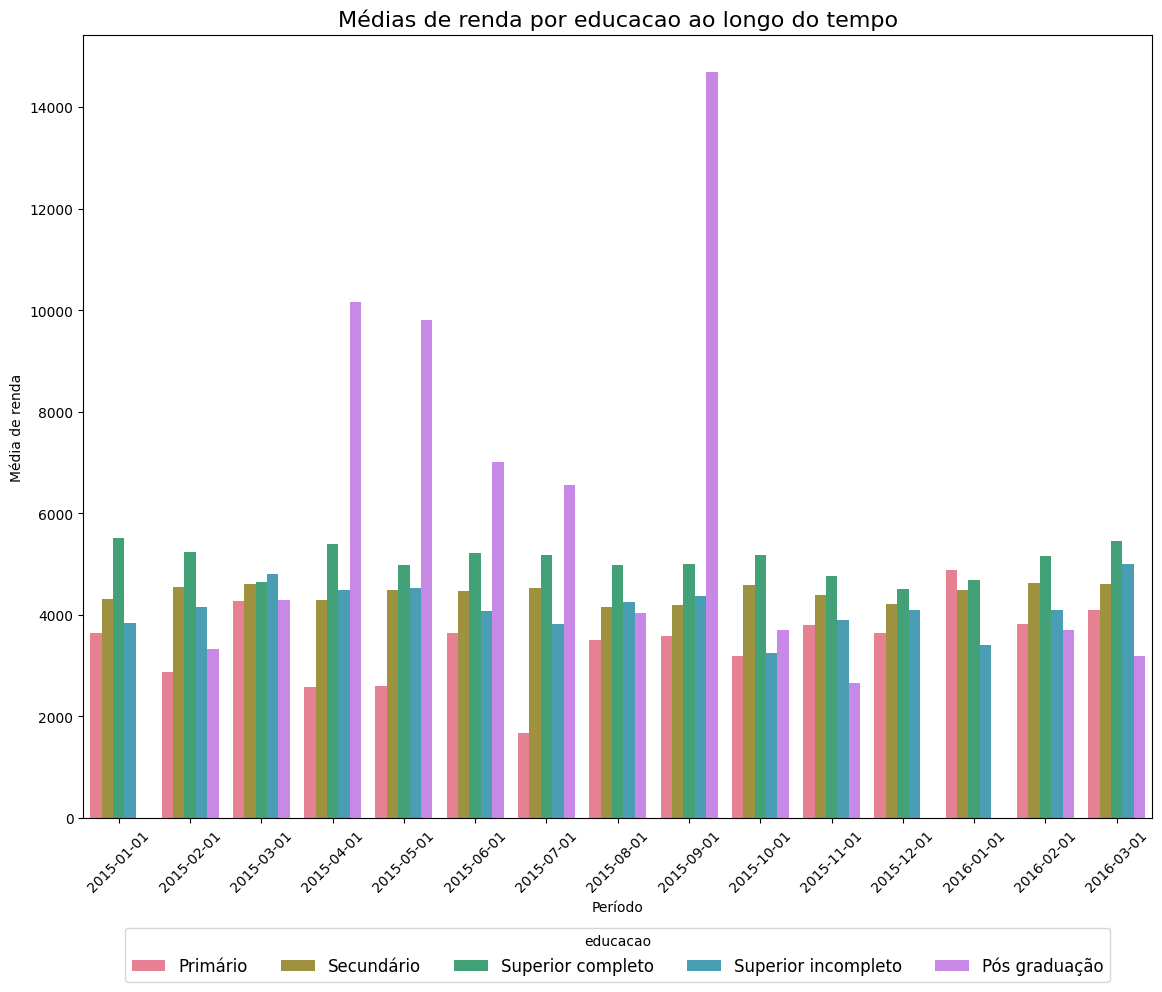

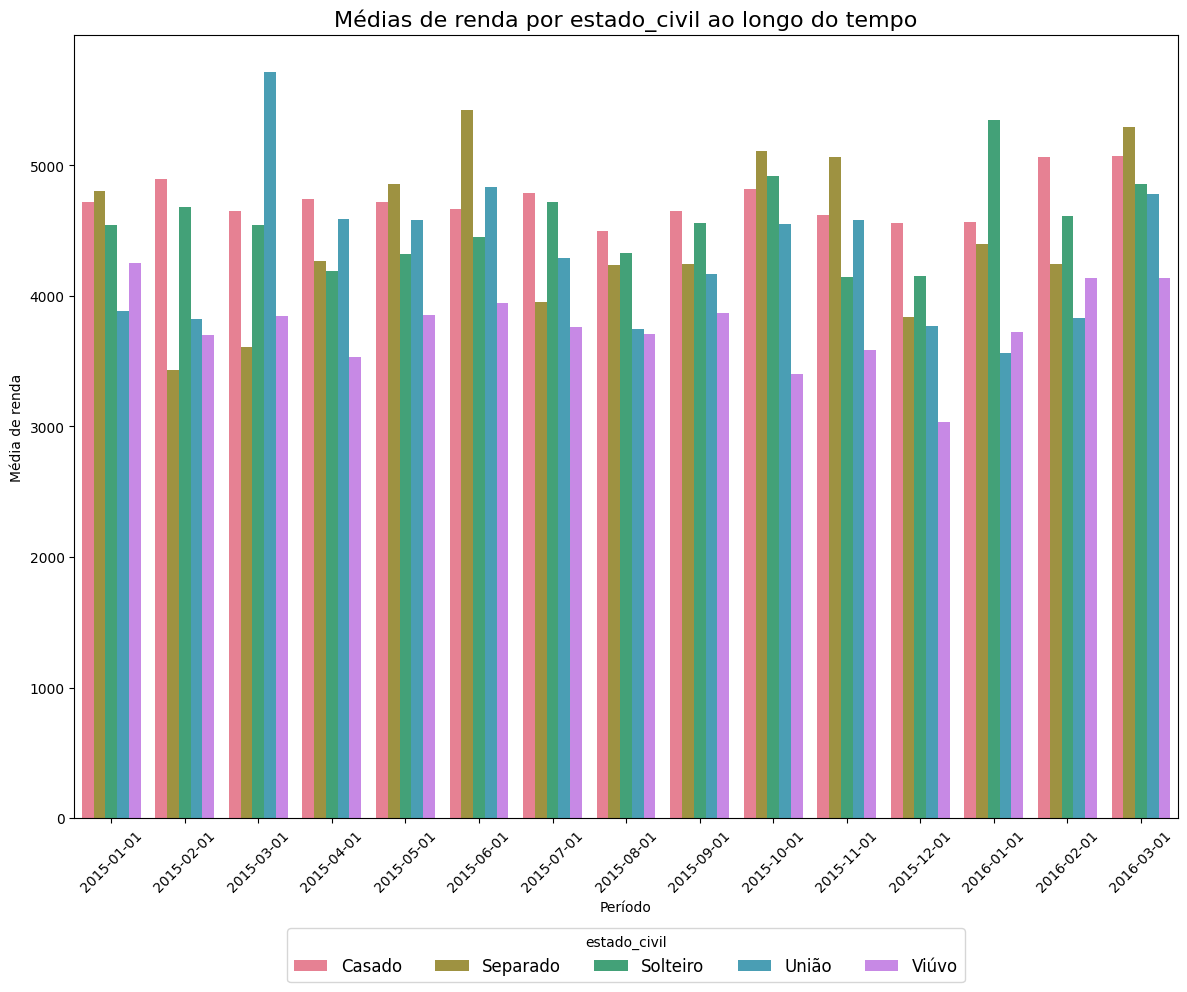

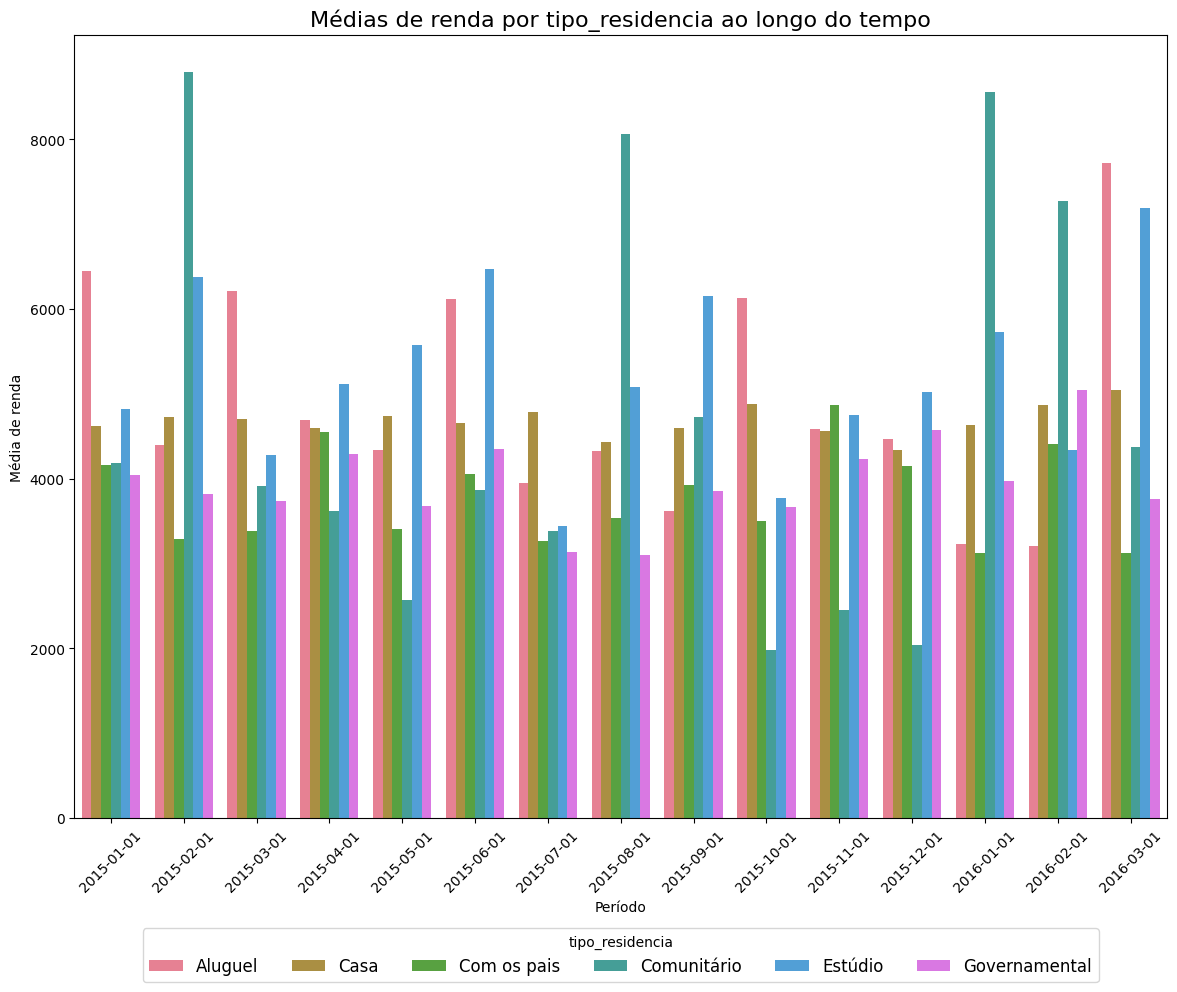

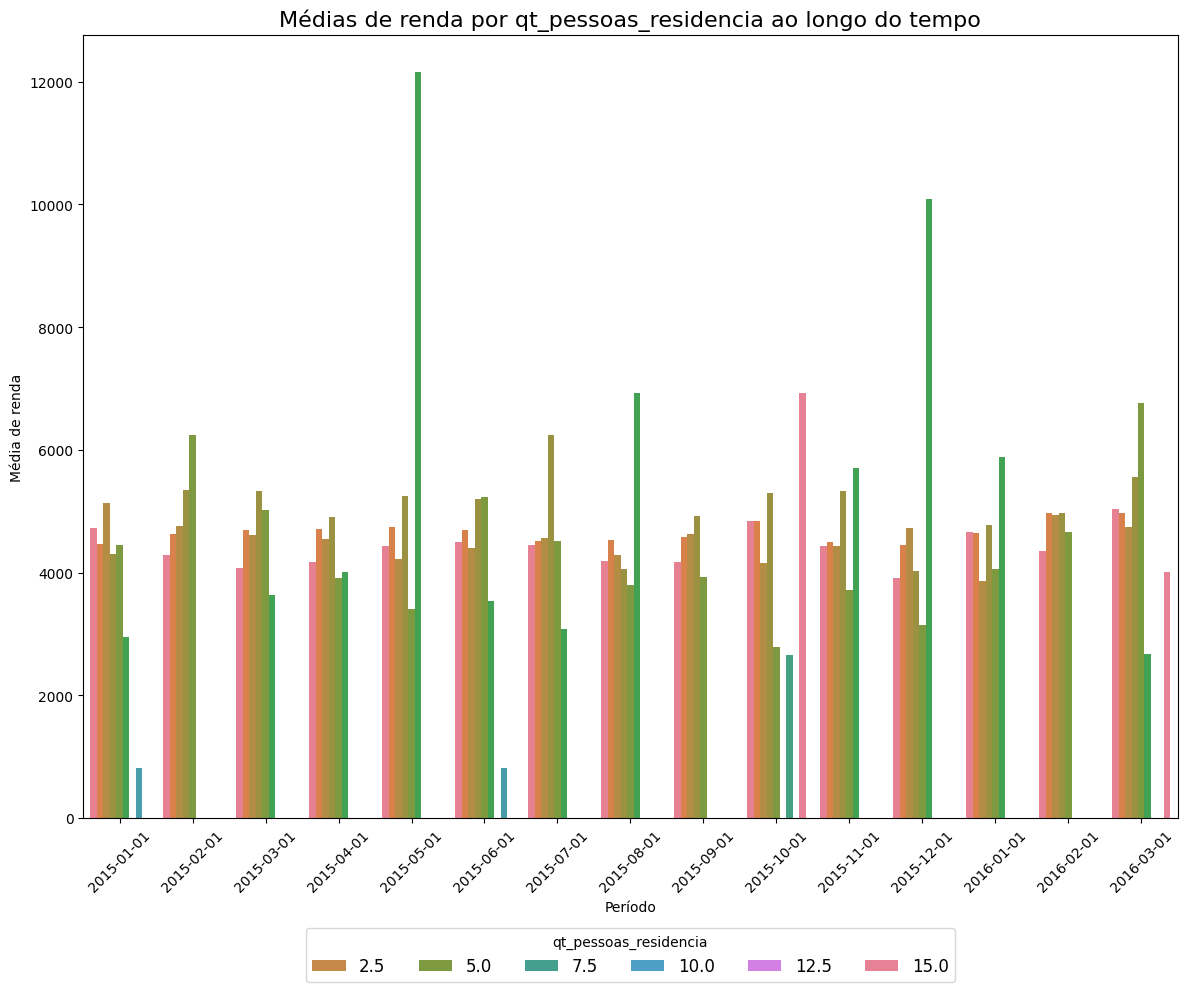

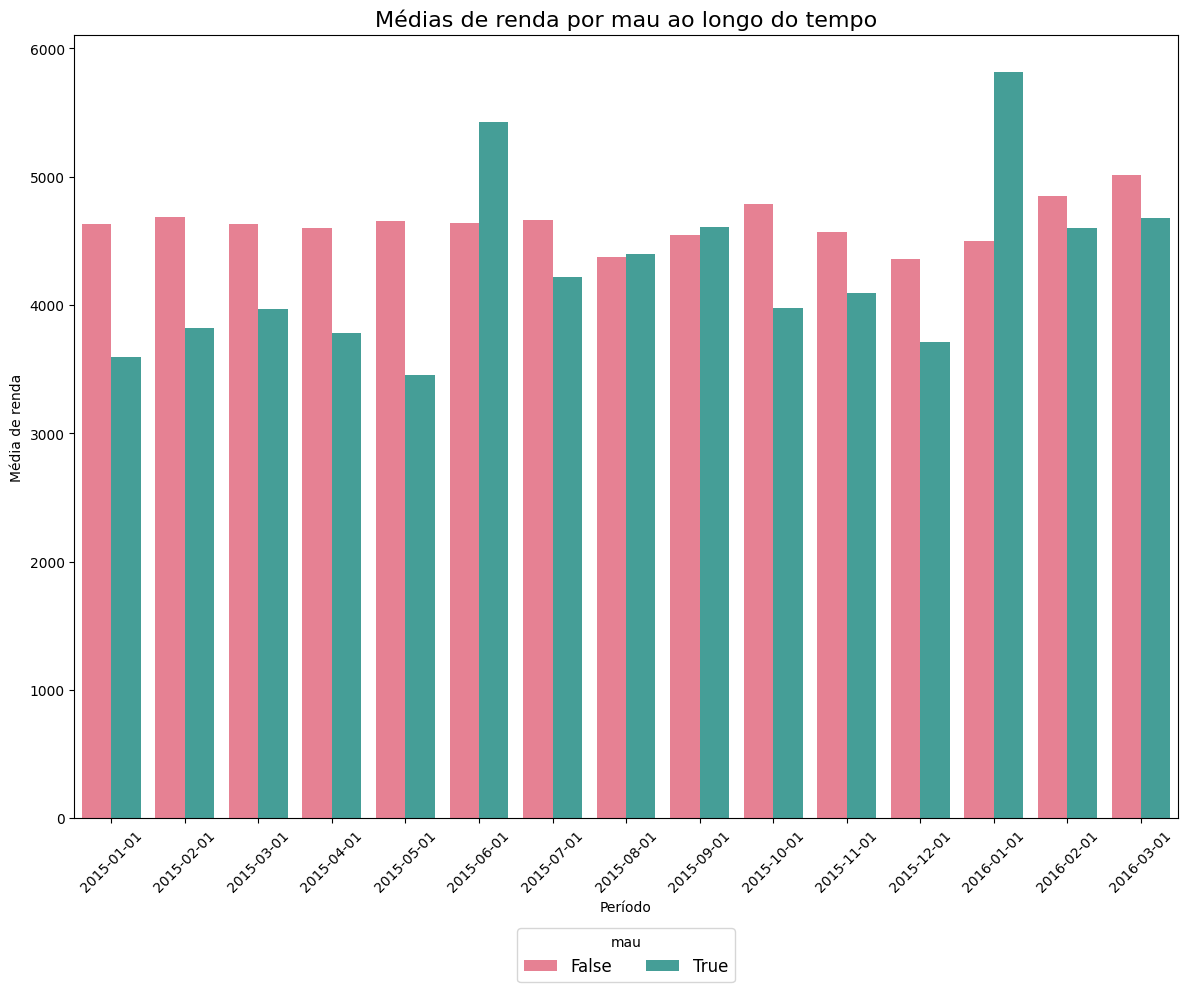

In [9]:
# Criando gráficos de barras para cada combinação de variável quantitativa e qualitativa
for quant_var in quantitative_vars:
    for qual_var in qualitative_vars:
        plt.figure(figsize=(12, 10))  # Aumentando a largura horizontal do gráfico
        
        # Calculando a média da variável quantitativa (quant_var) por data e variável qualitativa (qual_var)
        var_means = renda.groupby(['data_ref', qual_var])[quant_var].mean().reset_index(name='mean')
        
        # Criando o gráfico de barras com 'data_ref' no eixo X e 'mean' no eixo Y
        ax = sns.barplot(data=var_means, x='data_ref', y='mean', hue=qual_var, palette='husl')

        # Configurações do gráfico
        plt.title(f'Médias de {quant_var} por {qual_var} ao longo do tempo', fontsize=16)  # Título do gráfico
        plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhorar a legibilidade
        ax.set_xlabel('Período')  # Definindo rótulo do eixo X
        ax.set_ylabel(f'Média de {quant_var}')  # Definindo rótulo do eixo Y
        
        # Ajustando a legenda abaixo do eixo x
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=6, fontsize='large', title=qual_var)
        
        # Mostrando o gráfico
        plt.tight_layout()
        plt.show()

Os dados apresentados e análisado apresentam situações interessantes de serem analisadas em diversos cenários, em especial os dados de pagadores, de renda e tempo de emprego, apresentam variações interessantes ao longo dos meses. 

Os dados apresentados analisando-se em relação a média de idade apresentam menores variações do que as outras duas, seguido dos relacionados ao tempo de trabalho e, por fim, sobre a média de renda. As últimas duas variáveis base de análise geram pontos de outsiders na análise.